# COGS 108 - Does college cost really worth?

## Final Project Report
https://drive.google.com/file/d/1kXomuZhO_C1haPUfdBxFNf5FRncbwHud/view?usp=sharing

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [ ] NO - keep private

# Overview
In this project, we are trying to find the relationship between early/mid career pay and cost of attendance. Meanwhile, we are suspecting that there are some confounding variables like school type, admission rate, and SAT average score. We conduct the chronological analysis to ensure our dataset is consistent with basic knowledge. We separate our linear regression analysis into two parts: early career pay and mid career pay. In each analysis, we conduct the Multi-Collinearity Analysis by Variance Inflation Factor(VIF) and spot the necessity to separate future analysis by school type. Furthermore, we conduct linear regression analysis to find linear relationship between early/mid-career pay and other independent varibales following by an outlier analysis. We also conclude a prediction rule to predict the years needed for students to earn back their investment in college. Our conclusion from our results is that there is a statistically difference between the admission rate and early/mid career pay while other independent variables appear to have a linear relationship with early/mid career pay.

# Names

- Zhixing Jiang
- Feiran Zhu
- Yanni Chen
- Yufei Deng
- Xin Sheng

<a id='research_question'></a>
# Research Question

From 2009 to 2018, does the amount of college investment, measured by average annual cost of college attendance,  indicate bachelor students' early- (within 10 years of graduation) and mid-career (after 10 years of graduation) annual income in the US, considering the counfounding variables of admission rate and average SAT score? 

<a id='background'></a>

## Background & Prior Work

For several years, college tuition across the country has risen continuously. Many critics are arguing that colleges aren't worth it because of the potential high debt after graduation. Whereas others maintain that higher education indicates higher income in the future, so the debt doesn’t weigh that much, and college is undoubtedly worth it. This argument is supported by the U.S. Bureau of Labor Statistics (2020) data: according to the data, people’s earnings are proportional to education attainment. What’s more, there are previous studies indicating that education investment accounts for U.S. economic growth during the post-war time(Jorgenson & Fraumeni, 1992), which also underscore the significance of education investment. Whereas, to a more micro-perspective, and at the middle ground between the two sides, we notice a lack of study investigating the relationship between the average annual cost of college attendance and graduate income. Though we agree with the beneficial impact of education on future income, this cannot justify the high tuition fee of colleges, especially when there are noticeable differences between tuition across the country between public and private schools. Therefore, we decided to analyze the data and investigate the relationship between the average annual cost of college attendance and income. In order to analyze the relationship between those two variables, we collected the data of early career salary and mid-career salary, then built a linear model between personal investment in higher education and salary to infer whether there is a correlation between those two variables. Whereas, there might be some confounding variables such as admission test scores and admission rate. In this sense, we gathered some information on student admission scores and college ranking and perform a VIF analysis of multicollinearity in order to determine the collinearity between those confounding variables. 

References:
- 1)Jorgenson, D. W., & Fraumeni, B. M. (1992). Investment in Education and U.S. Economic Growth. The Scandinavian Journal of Economics, 94, S51–S70. https://doi.org/10.2307/3440246

- 2)U.S. Bureau of Labor Statistics (2020).https://www.bls.gov/emp/chart-unemployment-earnings-education.htm


# Hypothesis
We hypothesize that college attendance cost indicates graduates’ income in the United States. 

We believe that we will find a positive linear relationship between tuition and graduates’ income. There are also some confounding variables like admission rate, college entrance grades, and other variables that influence graduates’ employment. 


# Dataset(s)

- Dataset(s) Name: College Scorecard
- Link to the dataset: https://collegescorecard.ed.gov/data/
- Number of observations: approximately 2000 for each dataset
This is a file of datasets, which includes ten datasets convering significant amount of information about U.S between 2009-2018. colleges. They contain the information we are looking for in the project: admission rate, sat average, and cost of attendance.


- Dataset Name: Potential Salary
- Link to the dataset: https://www.kaggle.com/jessemostipak/college-tuition-diversity-and-pay?select=salary_potential.csv
- Number of observations: 936
This dataset contains the average potential salary for students in 936 colleges.


- Dataset Name: Tuition cost
- Link to the dataset: https://www.kaggle.com/jessemostipak/college-tuition-diversity-and-pay?select=tuition_cost.csv
- Number of observations: 2974
We are utilizing the public/private info in this dataset to further categorize the colleges in out analysis.


We are planning to merge these datasets by the institution name and combine them into a large dataset with variables we are interested in. Besides, we would calculate the average of admission rate, sat average, and cost of attendance over the ten year period.

# Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

## Variables we're interested in
### College Scorecard dataset (s)
| Variable Name | Description | 
| --- | --- |
| `INSTNM` | Institution name | 
| `ADM_RATE` | Admission rate |
| `SAT_AVG` | Average SAT equivalent score of students admitted | 
| `COSTT4_A` | Average cost of attendance (academic year institutions) | 

### Potential salary dataset
| Variable Name | Description |
| --- | --- | 
| `name` | Institution name | 
| `early_career_pay` | Median salary for alumni with 0-5 years experience | 
| `mid-career-pay` | Median salary for alumni with 10+ years experience |


### Tuition cost dataset
| Variable Name | Description |
| --- | --- | 
| `name` | Institution name | 
| `type` | Type of school: public, private, other | 


## Pickling
Because the dataset is too big in size, it's impossible to host on GitHub or Google Drive, so we first pickle the data locally to get rid of unnecessary columns, save the result in .pkl files, host on Google Drive, then read the .pkl file for future analysis. 

This part of code is already run and don't need to be run again. 

In [2]:
# For clean up before uploading
# Import csv files from local
# Year number in variable name represents the start year of that schoolyear

# salary = pd.read_csv("./data/salary_potential.csv")
# school_type = pd.read_csv("./data/tuition_cost.csv")
# data18 = pd.read_csv("./data/MERGED2018_19_PP.csv")
# data17 = pd.read_csv("./data/MERGED2017_18_PP.csv")
# data16 = pd.read_csv("./data/MERGED2016_17_PP.csv")
# data15 = pd.read_csv("./data/MERGED2015_16_PP.csv")
# data14 = pd.read_csv("./data/MERGED2014_15_PP.csv")
# data13 = pd.read_csv("./data/MERGED2013_14_PP.csv")
# data12 = pd.read_csv("./data/MERGED2012_13_PP.csv")
# data11 = pd.read_csv("./data/MERGED2011_12_PP.csv")
# data10 = pd.read_csv("./data/MERGED2010_11_PP.csv")
# data09 = pd.read_csv("./data/MERGED2009_10_PP.csv")


In [3]:
# Clean up unnecessary columns and export csv to save in Google Drive

# def drop_unnecessary_cols(df, year):
#     variables_of_interest = ["INSTNM", "ADM_RATE", "SAT_AVG", "COSTT4_A"]
#     df = df[variables_of_interest]

#     return df

# data18 = drop_unnecessary_cols(data18, 18)
# data17 = drop_unnecessary_cols(data17, 17)
# data16 = drop_unnecessary_cols(data16, 16)
# data15 = drop_unnecessary_cols(data15, 15)
# data14 = drop_unnecessary_cols(data14, 14)
# data13 = drop_unnecessary_cols(data13, 13)
# data12 = drop_unnecessary_cols(data12, 12)
# data11 = drop_unnecessary_cols(data11, 11)
# data10 = drop_unnecessary_cols(data10, 10)
# data09 = drop_unnecessary_cols(data09, 9)


In [4]:
# Export the pickle file

# data18.to_pickle("./newData/data18.pkl")
# data17.to_pickle("./newData/data17.pkl")
# data16.to_pickle("./newData/data16.pkl")
# data15.to_pickle("./newData/data15.pkl")
# data14.to_pickle("./newData/data14.pkl")
# data13.to_pickle("./newData/data13.pkl")
# data12.to_pickle("./newData/data12.pkl")
# data11.to_pickle("./newData/data11.pkl")
# data10.to_pickle("./newData/data10.pkl")
# data09.to_pickle("./newData/data09.pkl")

## Import
The dataset is already imported to Google Drive. We now import these files into variables for future cleaning and analysis. 

In [5]:
# Import csv files from google drive
salary = pd.read_csv("https://drive.google.com/uc?id=1Kti44x8xv_1pi4Qm7UVcct5C0c1S8KnF")
school_type = pd.read_csv("https://drive.google.com/uc?id=1JyOLrlH5JcDyTa7K5cqh95SZ_KmkP29K")
data18 = pd.read_pickle("https://drive.google.com/uc?id=1Dh3sH8LNRcauFUnddD13IL8VqVJjxLsP")
data17 = pd.read_pickle("https://drive.google.com/uc?id=1RneDBCxKJiTVLZ8omDLBXHD4A3-nzZ07")
data16 = pd.read_pickle("https://drive.google.com/uc?id=1b1GPiyq2kcKLBCzgpxiJbJwtdX2r6Oc4")
data15 = pd.read_pickle("https://drive.google.com/uc?id=1nsgPrbrv-RcrtvfG6WTkIXcwybFFetjf")
data14 = pd.read_pickle("https://drive.google.com/uc?id=1lHU2l9Rc96yNG5BLEurNQ5GtVJQou43w")
data13 = pd.read_pickle("https://drive.google.com/uc?id=12bVbO0zrkIE4AuouQGXrxj_ijFlhig6g")
data12 = pd.read_pickle("https://drive.google.com/uc?id=1TvmhUxpvV5KcPY-gEBKZhTvebNlg1hcH")
data11 = pd.read_pickle("https://drive.google.com/uc?id=1nKUAqp1kdDEY4P0zLOCqB9DpgLXtYN4q")
data10 = pd.read_pickle("https://drive.google.com/uc?id=1MUnawRY1aRK2_j70jZ-e_Xd3aaPrJGbK")
data09 = pd.read_pickle("https://drive.google.com/uc?id=1RItwmhnywZku7VCC1_iQVOF0GDAardwq")


In [6]:
# For debugging
data09

,INSTNM,ADM_RATE,SAT_AVG,COSTT4_A
0,Community College of the Air Force,NaN,NaN,NaN
1,Alabama A & M University,0.4726,851.0,13242.0
2,University of Alabama at Birmingham,0.8357,1107.0,16955.0
3,Amridge University,0.8750,NaN,20100.0
4,University of Alabama in Huntsville,0.7209,1145.0,16876.0
...,...,...,...,...
7212,Southeastern Institute-Nashville,NaN,NaN,NaN
7213,Make-up Designory,NaN,NaN,NaN
7214,Dayton School of Medical Massage-Lima,NaN,NaN,NaN
7215,Cincinnati School of Medical Massage,NaN,NaN,NaN


# Data Cleaning

## Cleaning

We first define a function for Collegeboard Scoreboard data cleaning, which:
* Extracts the columns we're interested in
* Renames the columns
* Removes observations with any null value

In [7]:
# A function that extracts useful columns and cleans up the data from College Scoreboard
# @param df The dataframe to be cleaned up
# @param year The year of that dataset
def data_cleaning(df, year):
    variables_of_interest = ["INSTNM", "ADM_RATE", "SAT_AVG", "COSTT4_A"]
    variables_new_name = ["name", "admission_rate"+"_" + str(year), "avg_SAT"+"_" + str(year), "avg_cost"+"_" + str(year)]
    df = df[variables_of_interest]
    # df = df.rename()
    df.columns = [str(col) for col in variables_new_name]
    df = df.dropna()

    return df

We then extract the useful columns in the `salary` dataframe and drop null values.

In [8]:
# Cleans up data in salary DataFrame
salary = salary[["name","early_career_pay","mid_career_pay"]]
salary = salary.dropna()

We then extract the useful columns in the `school_type` dataframe and leave only "Public" and "Private" values.

In [9]:
# Cleans up data in school_type DataFrame
school_type = school_type[["name","type"]]
school_type = school_type.dropna()
school_type = school_type[(school_type["type"] == "Public") | (school_type["type"] == "Private")]

We then apply the function `data_cleaning()` on 10 dataframes from Collegeboard Scoreboard. 

In [10]:
# Cleans up data in Collegeboard Scoreboard DataFrame
data18 = data_cleaning(data18, 18)
data17 = data_cleaning(data17, 17)
data16 = data_cleaning(data16, 16)
data15 = data_cleaning(data15, 15)
data14 = data_cleaning(data14, 14)
data13 = data_cleaning(data13, 13)
data12 = data_cleaning(data12, 12)
data11 = data_cleaning(data11, 11)
data10 = data_cleaning(data10, 10)
data09 = data_cleaning(data09, 9)

In [11]:
# For debugging
data17

,name,admission_rate_17,avg_SAT_17,avg_cost_17
0,Alabama A & M University,0.9027,929.0,22886.0
1,University of Alabama at Birmingham,0.9181,1195.0,24129.0
3,University of Alabama in Huntsville,0.8123,1322.0,22108.0
4,Alabama State University,0.9787,935.0,19413.0
5,The University of Alabama,0.5330,1278.0,28836.0
...,...,...,...,...
6442,Milligan University,0.5776,1184.0,42297.0
6452,Emory University-Oxford College,0.2894,1420.0,58900.0
6475,Husson University,0.8627,1048.0,28889.0
6584,Carolina University,0.3633,919.0,19145.0


## Merging
Now we have DataFrames containing valid variables and data we want, we will merge the data together and get the average value of these 10 years (2009-2018) in order to analyze its correlation with the corresponding mid-career salary in 2019. 

In [12]:
data_all = salary.merge(school_type, how="inner", on="name")
data_all = data_all.merge(data09, how="inner", on="name")
data_all = data_all.merge(data10, how="inner", on="name")
data_all = data_all.merge(data11, how="inner", on="name")
data_all = data_all.merge(data12, how="inner", on="name")
data_all = data_all.merge(data13, how="inner", on="name")
data_all = data_all.merge(data14, how="inner", on="name")
data_all = data_all.merge(data15, how="inner", on="name")
data_all = data_all.merge(data16, how="inner", on="name")
data_all = data_all.merge(data17, how="inner", on="name")
data_all = data_all.merge(data18, how="inner", on="name")
data_all

,name,early_career_pay,mid_career_pay,type,admission_rate_9,avg_SAT_9,avg_cost_9,admission_rate_10,avg_SAT_10,avg_cost_10,...,avg_cost_15,admission_rate_16,avg_SAT_16,avg_cost_16,admission_rate_17,avg_SAT_17,avg_cost_17,admission_rate_18,avg_SAT_18,avg_cost_18
0,Auburn University,54400,104500,Public,0.7950,1184.0,17966.0,0.7867,1221.0,19490.0,...,29164.0,0.8054,1217.0,29794.0,0.8393,1282.0,30458.0,0.7543,1289.0,31282.0
1,University of Alabama in Huntsville,57500,103900,Public,0.7209,1145.0,16876.0,0.6614,1163.0,17064.0,...,20999.0,0.7628,1257.0,22059.0,0.8123,1322.0,22108.0,0.8087,1314.0,23441.0
2,Tuskegee University,54500,93500,Private,0.5898,906.0,27570.0,0.5972,894.0,28752.0,...,34354.0,0.4999,1006.0,36457.0,0.5032,1036.0,36673.0,0.5182,1119.0,39383.0
3,Samford University,48400,90500,Private,0.8352,1140.0,31214.0,0.8669,1172.0,32527.0,...,42270.0,0.9138,1170.0,43666.0,0.8319,1230.0,44896.0,0.8208,1228.0,46474.0
4,Spring Hill College,46600,89100,Private,0.5501,1084.0,36565.0,0.5307,1087.0,37992.0,...,45489.0,0.4353,1121.0,47815.0,0.4568,1156.0,50954.0,0.6577,1130.0,51969.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,Wisconsin Lutheran College,46200,82500,Private,0.7287,1090.0,29472.0,0.7290,1084.0,30068.0,...,37044.0,0.9027,1107.0,38409.0,0.9025,1145.0,39394.0,0.8039,1142.0,41162.0
494,Viterbo University,46800,81900,Private,0.8694,1050.0,29220.0,0.8435,1050.0,29496.0,...,34867.0,0.6254,1065.0,36321.0,0.6145,1162.0,37585.0,0.7580,1172.0,38690.0
495,University of Wisconsin-Parkside,46000,81400,Public,0.9266,950.0,15838.0,0.8682,970.0,16552.0,...,15048.0,0.6246,970.0,15793.0,0.6077,1045.0,15399.0,0.6712,1065.0,16329.0
496,University of Wisconsin-River Falls,47100,81300,Public,0.8898,1030.0,14106.0,0.8619,1030.0,15149.0,...,17309.0,0.7215,1050.0,18746.0,0.7452,1125.0,18201.0,0.7507,1135.0,19471.0


We then take a closer look at the data to check. 

In [13]:
data_all["name"].value_counts()

Wesley College                  2
Sterling College                2
Auburn University               1
Valley City State University    1
University of Tulsa             1
                               ..
Western Kentucky University     1
Northern Kentucky University    1
University of Louisville        1
Centre College                  1
University of Wyoming           1
Name: name, Length: 496, dtype: int64

The checking result shows that there are two colleges, Wesley College and Sterling College, having two sets of observations, possbly because of having the same name or repeated observations collected. 

In [14]:
# We notice that there are some colleges with overlapping data
data_all[data_all.get('name') == 'Wesley College']

,name,early_career_pay,mid_career_pay,type,admission_rate_9,avg_SAT_9,avg_cost_9,admission_rate_10,avg_SAT_10,avg_cost_10,...,avg_cost_15,admission_rate_16,avg_SAT_16,avg_cost_16,admission_rate_17,avg_SAT_17,avg_cost_17,admission_rate_18,avg_SAT_18,avg_cost_18
61,Wesley College,45400,77300,Private,0.6286,855.0,26977.0,0.6295,850.0,32135.0,...,38227.0,0.6047,830.0,39189.0,0.6151,903.0,40484.0,0.6182,925.0,40607.0
62,Wesley College,45400,77300,Private,0.7714,840.0,18141.0,0.6295,850.0,32135.0,...,38227.0,0.6047,830.0,39189.0,0.6151,903.0,40484.0,0.6182,925.0,40607.0


The two Wesley College have the same name but different observations so we will keep both of them. The overlapping name does not affect our analysis because we will only analyze the observations but not college names. 

In [15]:
# We notice that there are some colleges with overlapping data
data_all[data_all.get('name') == 'Sterling College']

,name,early_career_pay,mid_career_pay,type,admission_rate_9,avg_SAT_9,avg_cost_9,admission_rate_10,avg_SAT_10,avg_cost_10,...,avg_cost_15,admission_rate_16,avg_SAT_16,avg_cost_16,admission_rate_17,avg_SAT_17,avg_cost_17,admission_rate_18,avg_SAT_18,avg_cost_18
153,Sterling College,42700,79100,Private,0.5509,1003.0,24930.0,0.5043,996.0,26780.0,...,32261.0,0.3737,967.0,33742.0,0.5247,1018.0,35102.0,0.4052,1039.0,36070.0
154,Sterling College,42700,79100,Private,0.5509,1003.0,24930.0,0.5043,996.0,26780.0,...,32261.0,0.3737,967.0,33742.0,0.5247,1018.0,35102.0,0.4052,1039.0,36070.0


The two Sterling College have the same name and the same observations, indicating repeated observations collected. We will drop one of them to prevent repeated numbers changing analysis results. 

In [16]:
data_all = data_all.drop([62,154],axis = 0).reset_index().drop(columns = ['index'])
data_all

,name,early_career_pay,mid_career_pay,type,admission_rate_9,avg_SAT_9,avg_cost_9,admission_rate_10,avg_SAT_10,avg_cost_10,...,avg_cost_15,admission_rate_16,avg_SAT_16,avg_cost_16,admission_rate_17,avg_SAT_17,avg_cost_17,admission_rate_18,avg_SAT_18,avg_cost_18
0,Auburn University,54400,104500,Public,0.7950,1184.0,17966.0,0.7867,1221.0,19490.0,...,29164.0,0.8054,1217.0,29794.0,0.8393,1282.0,30458.0,0.7543,1289.0,31282.0
1,University of Alabama in Huntsville,57500,103900,Public,0.7209,1145.0,16876.0,0.6614,1163.0,17064.0,...,20999.0,0.7628,1257.0,22059.0,0.8123,1322.0,22108.0,0.8087,1314.0,23441.0
2,Tuskegee University,54500,93500,Private,0.5898,906.0,27570.0,0.5972,894.0,28752.0,...,34354.0,0.4999,1006.0,36457.0,0.5032,1036.0,36673.0,0.5182,1119.0,39383.0
3,Samford University,48400,90500,Private,0.8352,1140.0,31214.0,0.8669,1172.0,32527.0,...,42270.0,0.9138,1170.0,43666.0,0.8319,1230.0,44896.0,0.8208,1228.0,46474.0
4,Spring Hill College,46600,89100,Private,0.5501,1084.0,36565.0,0.5307,1087.0,37992.0,...,45489.0,0.4353,1121.0,47815.0,0.4568,1156.0,50954.0,0.6577,1130.0,51969.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,Wisconsin Lutheran College,46200,82500,Private,0.7287,1090.0,29472.0,0.7290,1084.0,30068.0,...,37044.0,0.9027,1107.0,38409.0,0.9025,1145.0,39394.0,0.8039,1142.0,41162.0
492,Viterbo University,46800,81900,Private,0.8694,1050.0,29220.0,0.8435,1050.0,29496.0,...,34867.0,0.6254,1065.0,36321.0,0.6145,1162.0,37585.0,0.7580,1172.0,38690.0
493,University of Wisconsin-Parkside,46000,81400,Public,0.9266,950.0,15838.0,0.8682,970.0,16552.0,...,15048.0,0.6246,970.0,15793.0,0.6077,1045.0,15399.0,0.6712,1065.0,16329.0
494,University of Wisconsin-River Falls,47100,81300,Public,0.8898,1030.0,14106.0,0.8619,1030.0,15149.0,...,17309.0,0.7215,1050.0,18746.0,0.7452,1125.0,18201.0,0.7507,1135.0,19471.0


After the data was merged and cleaned, we will use school type and ten-year average of admission rate, SAT, cost of attendance from 2009 to 2018 as independent variables to examine their relationships with the dependent variable--early-career pay, which collects subjects' (with a wide-range of enrollment years) average annual salary within the first 5 years of graduation. 

The datasets College Scoreboard have only null values in cost of attendance so we cannot calculate ten-year average from 1999 to 2009 for analyzing mid-career pay, which collects subject' average annual salary after 10 years of graduation. We decide to use 2009 data, right at 10 years ago from 2018 when the dataset Potential Salary is collected. 

In [17]:
data_admission = data_all.get(['admission_rate_9','admission_rate_10','admission_rate_11',
              'admission_rate_12','admission_rate_13','admission_rate_14',
              'admission_rate_15','admission_rate_16','admission_rate_17',
             'admission_rate_18'])
data_admission['admission_rate_avg'] = data_admission.mean(axis = 1)
data_sat = data_all.get(['avg_SAT_9','avg_SAT_10','avg_SAT_11','avg_SAT_12',
                         'avg_SAT_13','avg_SAT_14','avg_SAT_15','avg_SAT_16',
                         'avg_SAT_17','avg_SAT_18',])
data_sat['sat_avg'] = data_sat.mean(axis = 1)
data_cost = data_all.get(['avg_cost_9','avg_cost_10','avg_cost_11','avg_cost_12','avg_cost_13','avg_cost_14',
                         'avg_cost_15','avg_cost_16','avg_cost_17','avg_cost_18'])
data_cost['cost_of_attendance_avg'] = data_cost.mean(axis = 1)
data_all = data_all.assign(admission_rate_avg = data_admission.get('admission_rate_avg'),
               sat_avg = data_sat.get('sat_avg'),
               cost_of_attendance_avg = data_cost.get('cost_of_attendance_avg'))

data_cleaned = data_all.get(['name','early_career_pay','mid_career_pay','type','admission_rate_avg','sat_avg','cost_of_attendance_avg', 'admission_rate_9', 'avg_SAT_9', 'avg_cost_9'])
data_cleaned

,name,early_career_pay,mid_career_pay,type,admission_rate_avg,sat_avg,cost_of_attendance_avg,admission_rate_9,avg_SAT_9,avg_cost_9
0,Auburn University,54400,104500,Public,0.78917,1226.2,25071.6,0.7950,1184.0,17966.0
1,University of Alabama in Huntsville,57500,103900,Public,0.76180,1214.7,20271.9,0.7209,1145.0,16876.0
2,Tuskegee University,54500,93500,Private,0.53673,966.1,33073.4,0.5898,906.0,27570.0
3,Samford University,48400,90500,Private,0.83725,1176.8,39204.8,0.8352,1140.0,31214.0
4,Spring Hill College,46600,89100,Private,0.49839,1109.3,44046.8,0.5501,1084.0,36565.0
...,...,...,...,...,...,...,...,...,...,...
491,Wisconsin Lutheran College,46200,82500,Private,0.77913,1103.2,34959.3,0.7287,1090.0,29472.0
492,Viterbo University,46800,81900,Private,0.72404,1092.8,33587.0,0.8694,1050.0,29220.0
493,University of Wisconsin-Parkside,46000,81400,Public,0.77422,989.0,16022.2,0.9266,950.0,15838.0
494,University of Wisconsin-River Falls,47100,81300,Public,0.84350,1056.0,16902.2,0.8898,1030.0,14106.0


In [18]:
# Convert school names to lower cases
def to_lower(str):
    return str.lower()

data_cleaned = data_cleaned.assign(name = data_cleaned.get('name').apply(to_lower))
data_cleaned

,name,early_career_pay,mid_career_pay,type,admission_rate_avg,sat_avg,cost_of_attendance_avg,admission_rate_9,avg_SAT_9,avg_cost_9
0,auburn university,54400,104500,Public,0.78917,1226.2,25071.6,0.7950,1184.0,17966.0
1,university of alabama in huntsville,57500,103900,Public,0.76180,1214.7,20271.9,0.7209,1145.0,16876.0
2,tuskegee university,54500,93500,Private,0.53673,966.1,33073.4,0.5898,906.0,27570.0
3,samford university,48400,90500,Private,0.83725,1176.8,39204.8,0.8352,1140.0,31214.0
4,spring hill college,46600,89100,Private,0.49839,1109.3,44046.8,0.5501,1084.0,36565.0
...,...,...,...,...,...,...,...,...,...,...
491,wisconsin lutheran college,46200,82500,Private,0.77913,1103.2,34959.3,0.7287,1090.0,29472.0
492,viterbo university,46800,81900,Private,0.72404,1092.8,33587.0,0.8694,1050.0,29220.0
493,university of wisconsin-parkside,46000,81400,Public,0.77422,989.0,16022.2,0.9266,950.0,15838.0
494,university of wisconsin-river falls,47100,81300,Public,0.84350,1056.0,16902.2,0.8898,1030.0,14106.0


Now, this dataframe has all independent variables--school type, admission rate, SAT, cost of attendance--in 2009-2018 average and 2009 formats, corresponding to the dependent variables--early-career pay and mid-career pay. There is no null value and every school have all the data that we need, so the data is cleaned and ready for analysis. 

For easier uses, we seperate the data based on school types below.  

In [19]:
#public schools
data_public = data_cleaned[data_cleaned.get('type') == 'Public']
data_public

,name,early_career_pay,mid_career_pay,type,admission_rate_avg,sat_avg,cost_of_attendance_avg,admission_rate_9,avg_SAT_9,avg_cost_9
0,auburn university,54400,104500,Public,0.78917,1226.2,25071.6,0.7950,1184.0,17966.0
1,university of alabama in huntsville,57500,103900,Public,0.76180,1214.7,20271.9,0.7209,1145.0,16876.0
5,university of alabama at birmingham,48600,87200,Public,0.78537,1136.9,20894.9,0.8357,1107.0,16955.0
6,university of south alabama,47700,86400,Public,0.84015,1062.6,17082.2,0.8965,990.0,13581.0
7,troy university,44500,81500,Public,0.76989,1014.2,16934.2,0.6624,970.0,13855.0
...,...,...,...,...,...,...,...,...,...,...
485,university of wisconsin-la crosse,49600,88300,Public,0.73863,1152.0,17134.8,0.6673,1145.0,15143.0
489,university of wisconsin-oshkosh,47700,84300,Public,0.77778,1045.0,17164.3,0.8256,1030.0,15457.0
493,university of wisconsin-parkside,46000,81400,Public,0.77422,989.0,16022.2,0.9266,950.0,15838.0
494,university of wisconsin-river falls,47100,81300,Public,0.84350,1056.0,16902.2,0.8898,1030.0,14106.0


In [20]:
#private schools
data_private = data_cleaned[data_cleaned.get('type') == 'Private']
data_private

,name,early_career_pay,mid_career_pay,type,admission_rate_avg,sat_avg,cost_of_attendance_avg,admission_rate_9,avg_SAT_9,avg_cost_9
2,tuskegee university,54500,93500,Private,0.53673,966.1,33073.4,0.5898,906.0,27570.0
3,samford university,48400,90500,Private,0.83725,1176.8,39204.8,0.8352,1140.0,31214.0
4,spring hill college,46600,89100,Private,0.49839,1109.3,44046.8,0.5501,1084.0,36565.0
10,huntingdon college,42400,78900,Private,0.60124,1023.2,31939.4,0.6652,1012.0,28842.0
11,oakwood university,43500,78800,Private,0.47351,931.7,34277.6,0.5611,890.0,30842.0
...,...,...,...,...,...,...,...,...,...,...
487,carroll university,45600,86500,Private,0.77501,1100.4,37829.5,0.6923,1090.0,31042.0
488,carthage college,48900,85400,Private,0.70139,1127.3,46122.7,0.7491,1091.0,36943.0
490,cardinal stritch university,47000,82500,Private,0.64445,1019.1,36883.7,0.4076,1045.0,32922.0
491,wisconsin lutheran college,46200,82500,Private,0.77913,1103.2,34959.3,0.7287,1090.0,29472.0


# Data Analysis & Results

## Descriptive Analysis

Now that we have the cleaned data at hand, we first check whether the data types are valid for further analysis. 

In [21]:
data_cleaned.dtypes

name                       object
early_career_pay            int64
mid_career_pay              int64
type                       object
admission_rate_avg        float64
sat_avg                   float64
cost_of_attendance_avg    float64
admission_rate_9          float64
avg_SAT_9                 float64
avg_cost_9                float64
dtype: object

It appears that our entries (career pay, admission rate, SAT average, cost of attendance) are valid numerical floats or integers for further use. Other variables (university name, type) are stored as strings. 

We then look at the basic statistic properties (mean/median, standard eviations) of the numerical variables to examine the data's centers and spreads. 

In [22]:
data_cleaned.describe()

,early_career_pay,mid_career_pay,admission_rate_avg,sat_avg,cost_of_attendance_avg,admission_rate_9,avg_SAT_9,avg_cost_9
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,51701.814516,93632.661290,0.636871,1121.679839,34379.047177,0.641267,1100.975806,28877.760081
std,8436.556860,16221.961102,0.186544,135.879436,14733.164589,0.192600,136.331664,12354.592799
min,32500.000000,61900.000000,0.058710,832.300000,12028.500000,0.079700,784.000000,9186.000000
25%,46000.000000,81900.000000,0.560785,1032.900000,20161.875000,0.544375,1010.000000,16972.250000
50%,49700.000000,89900.000000,0.681410,1094.250000,33831.550000,0.670800,1079.000000,28310.500000
75%,55525.000000,101050.000000,0.769577,1186.125000,46205.850000,0.777025,1173.000000,38448.250000
max,88800.000000,158200.000000,0.988750,1538.400000,63872.200000,1.000000,1514.000000,52460.000000


On average, mid_career_pay is higher than early_career_pay according to higher mean from 2009-2018 because staying in the industry for a longer time will be paid more in general. (source 1) The mid_career_pay has higher variability than early_career_pay according to higher standard deviation from 2009-2018 because different attitude and devotion after getting into the industry contributes to different results. (source 2)

The admission_rate_avg and the admission_rate_9 are very close in mean and standard deviation, showing small changes in admission rate from 2009 to 2018, while the minimum and maximum values of admission_rate_avg are slightly smaller than admission_rate_9, indicating slightly more acceptance in 2009 than from 2009 to 2018. Possible reasons include more students applying colleges with fixed number of sits available. (source 3) Both have very wide spread due to high standard deviations compared to mean such that 3SD within the mean is very close to 0 and 100% and huge difference between maximum and minimum values, possibly caused by the persuit of colleges with high reputation but ignoring of colleges with little reputation. (source 4)

The sat_avg and avg_sat_9 are very similar according to mean and standard deviations, showing small changes in average SAT scores of incoming students from 2009 to 2018, while the minimum and maximum values of sat_avg are slightly larger than avg_sat_9, indicating slightly lower student quality in 2009 than from 2009 to 2018. (source 5) Both sat_avg and sat_9 do not vary much across colleges due to relatively small standard deviation compared to the mean. However, both maximum values are over 1500 and very close to the full points of 1600, showing very high standard in selecting students in some colleges. (source 6)

The cost_of_attendance_avg has much larger mean than the avg_cost_9 with higher standard deviation, indicating higher college investment from 2009 to 2018 than in 2009 alone. The possible causes include inflation. (source 7)

References(include links)
1) Hollon, J. (2018, July 8). Remember those 3% salary increases? now, they're the 'new normal'. TLNT. Retrieved February 25, 2022, from https://www.tlnt.com/remember-those-3-salary-increases-now-theyre-the-new-normal/  
2) U.S. Bureau of Labor Statistics. (n.d.). Same occupation, different pay: How wages vary : Career outlook. U.S. Bureau of Labor Statistics. Retrieved February 25, 2022, from https://www.bls.gov/careeroutlook/2015/article/wage-differences.htm  
3) Los Angeles Times. (2021, October 4). Op-ed: Another record year for college applications? please, no. Los Angeles Times. Retrieved February 25, 2022, from https://www.latimes.com/opinion/story/2021-10-04/college-admissions-record-applications  
4) DeSilver, D. (2020, May 30). A majority of U.S. colleges admit most students who apply. Pew Research Center. Retrieved February 25, 2022, from https://www.pewresearch.org/fact-tank/2019/04/09/a-majority-of-u-s-colleges-admit-most-students-who-apply/  
5) Published by Erin Duffin, &amp; 10, S. (2021, September 10). U.S. number of college students 1965-2020. Statista. Retrieved February 25, 2022, from https://www.statista.com/statistics/183995/us-college-enrollment-and-projections-in-public-and-private-institutions/  
6) Understand what's a good SAT score for college admissions ... (n.d.). Retrieved February 25, 2022, from https://www.usnews.com/education/best-colleges/articles/understand-whats-a-good-sat-score-for-college-admissions  
7) Marcus, J. (2022, February 4). Inflation is coming to college campuses. prepare to pay more. The Hechinger Report. Retrieved February 26, 2022, from https://hechingerreport.org/the-next-consumer-product-likely-to-cost-americans-more-going-to-college/ 

For a more general idea about the distribution and relationship of variables, we look at the scatter matrix of the dataframe. 

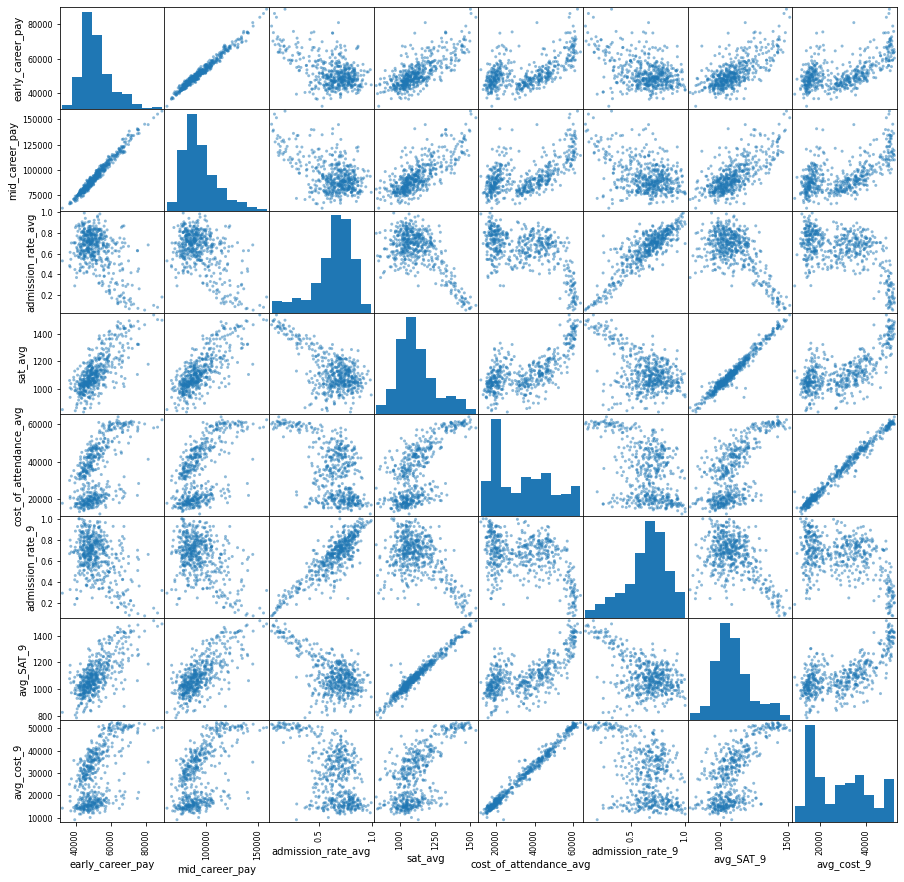

In [23]:
scatter_matrix = pd.plotting.scatter_matrix(frame = data_cleaned, figsize = (15, 15))

Disregarding the linear trend for the same variable between 10-year-average and 2009-alone, we discovered some seemingly co-linear relationship among our independent variables: admission rate, SAT average, and cost of attendance. 

## Chronological Trend
We now analyze the chronological change within each variable between 10-year-average and 2009-alone data. 

We expect that they show a very positive linear relationships as in the scatter matrix shows, because the same variable should not have significant changes deviating from the general positive trend, given that there is no significant change in the US affecting the education system from 2009 to 2018. (source 1)

References (include links)
1) Kober, Nancy (2020). History and Evolution of Public Education in the US. Retrieved March 12, 2022, from https://files.eric.ed.gov/fulltext/ED606970.pdf

Text(0.5, 1.0, 'career pay survey in 2018')

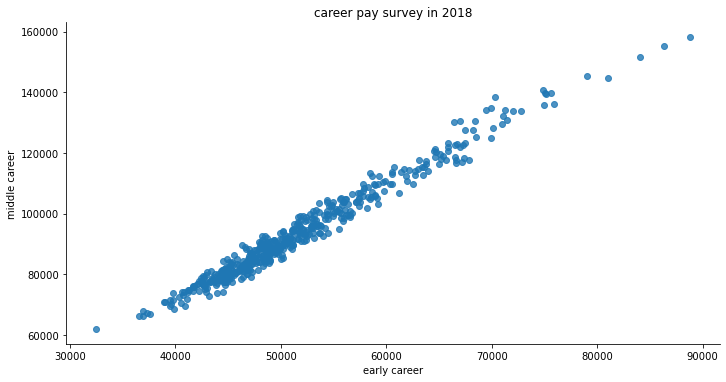

In [24]:
sns.lmplot(x = "early_career_pay", y = "mid_career_pay", data = data_cleaned, aspect = 2, fit_reg = False)
plt.xlabel("early career")
plt.ylabel("middle career")
plt.title("career pay survey in 2018")

The scatterplot of pay comparing early and middle careers shows a positive trend such that higher early career pay tend to have higher middle career pay without observable outliers. 

Text(0.5, 1.0, 'admission rate')

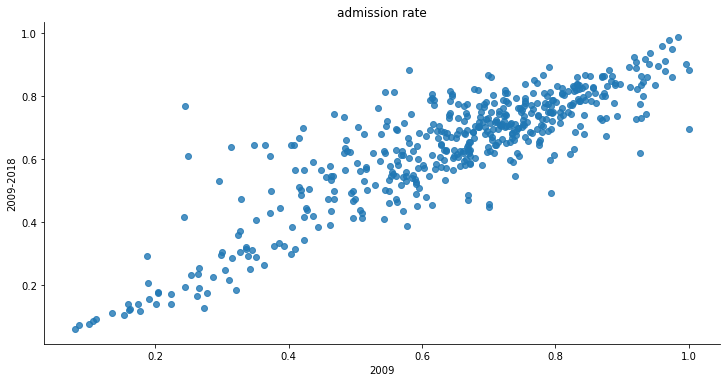

In [25]:
sns.lmplot(x = "admission_rate_9", y = "admission_rate_avg", data = data_cleaned, aspect = 2, fit_reg = False)
plt.xlabel("2009")
plt.ylabel("2009-2018")
plt.title("admission rate")

The scatterplot of admission rate comparing 2009 and 2009-2018 shows a positive trend such that higher admission rate early tend to have higher admission rate later with one college showing small 2009 admission rate of around 0.25 but large 2009-2018 admission rate approaching 0.8. 

We take a look at the outlier. 

In [26]:
admission_rate_outlier = data_cleaned[(data_cleaned["admission_rate_9"] < 0.3) & (0.7 < data_cleaned["admission_rate_avg"])]
admission_rate_outlier

,name,early_career_pay,mid_career_pay,type,admission_rate_avg,sat_avg,cost_of_attendance_avg,admission_rate_9,avg_SAT_9,avg_cost_9
248,delta state university,40800,74200,Public,0.76987,984.9,17263.3,0.2444,930.0,14250.0


We can see that Delta State University has an enormous increase in the admission rate from 2009 to 10-year-average. This might due to the change of university admission plan, or an abnormal circumstance in 2009. This could potentially influence our analysis result, because contrary to our expectation that low admission rate gives higher career pay, Delta State University has low admission rate in 2009 than average universities, but has a lower mid-career pay. This might end up as an outlier in our future analysis. 

Text(0.5, 1.0, 'average SAT scores of incoming freshman')

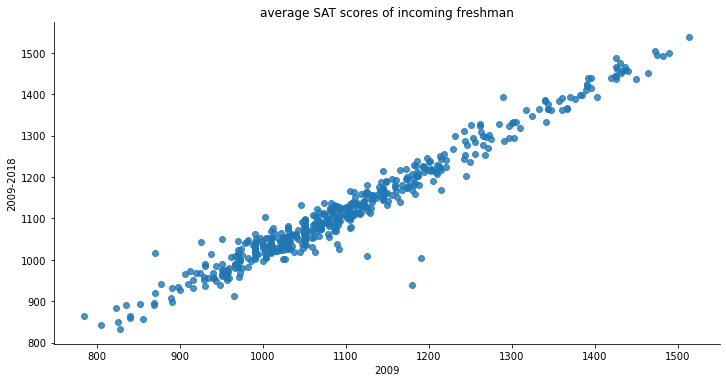

In [27]:
sns.lmplot(x = "avg_SAT_9", y = "sat_avg", data = data_cleaned, aspect = 2, fit_reg = False)
plt.xlabel("2009")
plt.ylabel("2009-2018")
plt.title("average SAT scores of incoming freshman")

The scatterplot of average SAT scores of incoming freshman comparing 2009 and 2009-2018 shows a positive trend such that higher average SAT scores early tend to have higher average SAT scores later with tow colleges showing large 2009 average SAT scores approaching 1200 but small 2009-2018 average SAT scores around 950. 

We take a look at the 2 outliers.

In [28]:
SAT_outlier = data_cleaned[(data_cleaned["avg_SAT_9"] > 1150) & (data_cleaned["sat_avg"] < 1100)]
SAT_outlier

,name,early_career_pay,mid_career_pay,type,admission_rate_avg,sat_avg,cost_of_attendance_avg,admission_rate_9,avg_SAT_9,avg_cost_9
12,university of west alabama,42700,76100,Public,0.58472,1004.3,17372.4,0.6208,1190.0,13621.0
252,tougaloo college,36900,66400,Private,0.47237,939.0,20404.1,0.3291,1179.0,19554.0


We can see that University of West Alabama and Tougaloo College have a big drop in SAT average score from 2009 to 10-year-average. This shows a decrease of overall student quality. This could potentially influence our analysis result, because contrary to our expectation that high SAT score gives higher career pay, these universities have high SAT scores in 2009 than average universities, but have a lower mid-career pay. They might end up as outliers in our future analysis.

Text(0.5, 1.0, 'cost of attendance per year for 4-year graduation')

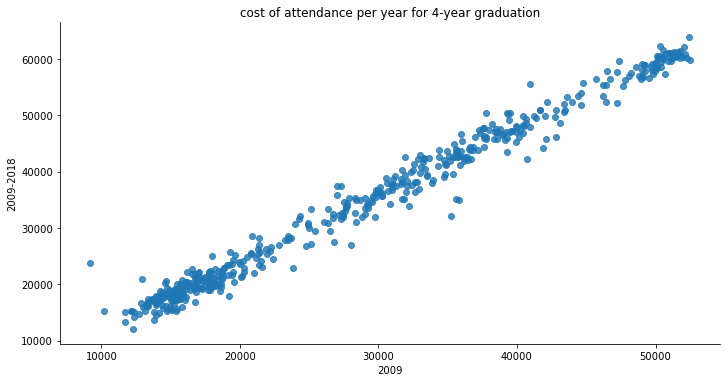

In [29]:
sns.lmplot(x = "avg_cost_9", y = "cost_of_attendance_avg", data = data_cleaned, aspect = 2, fit_reg = False)
plt.xlabel("2009")
plt.ylabel("2009-2018")
plt.title("cost of attendance per year for 4-year graduation")

The scatterplot of cost of attendance per year for 4-year graduation comparing 2009 and 2009-2018 shows a positive trend such that higher cost of attendance early tend to have higher cost of attendance later with one college showing small 2009 cost of attendance around 10000 but large 2009-2018 cost of attendance near 25000. 

We take a look at the outlier.

In [30]:
cost_of_attendance_outlier = data_cleaned[(data_cleaned["avg_cost_9"] < 10000) & (data_cleaned["cost_of_attendance_avg"] > 20000)]
cost_of_attendance_outlier

,name,early_career_pay,mid_career_pay,type,admission_rate_avg,sat_avg,cost_of_attendance_avg,admission_rate_9,avg_SAT_9,avg_cost_9
172,berea college,39500,71600,Private,0.29062,1130.2,23849.4,0.188,1089.0,9186.0


We can see that Berea College has an enormous increase in the cost of attendance from 2009 to 10-year-average. This might due to the change of university financial situation and plan. This could potentially influence our analysis result, because contrary to our expectation that high cost of attendance gives higher career pay, Delta State University has much lower cost of attendance in 2009 than average universities, but has a relatively high mid-career pay. This might end up as an outlier in our future analysis.

## Early Career Pay Analysis
We now do the inferential analysis on the independent variables related to the early career pay. They are the average admission rate, SAT average, cost of attendance between 2008 and 2019. 

### Multi-Collinearity Analysis by Variance Inflation Factor (VIF)

We want to test the multi-collinearity in our independent variables. We use VIF to have an idea about whether exists an explanatory variable that have a correlation with other explanatory variables. VIF is a metric used to detect multi-collinearity. If VIF shows that there is a severe correlation among an exploratory variable we are interested in, we will consider that there is multicollinearity among our independent variables, and we will have to conduct more analysis on it. 

In [31]:
#find design matrix for linear regression model using 'rating' as response variable 

outcome_ec_SAT_ADM, predictors_ec_SAT_ADM = patsy.dmatrices("early_career_pay ~ cost_of_attendance_avg + type + sat_avg + admission_rate_avg", data=data_cleaned, return_type='dataframe')

#calculate VIF for each explanatory variable
vif_ec = pd.DataFrame()
vif_ec['VIF'] = [vif(predictors_ec_SAT_ADM.values, i) for i in range(predictors_ec_SAT_ADM.shape[1])]
vif_ec['variable'] = predictors_ec_SAT_ADM.columns

#view VIF for each explanatory variable 
vif_ec

,VIF,variable
0,197.117889,Intercept
1,4.180767,type[T.Public]
2,6.943932,cost_of_attendance_avg
3,2.796329,sat_avg
4,1.773526,admission_rate_avg


The value for VIF starts at 1 and has no upper limit. According to [*How to Calculate Vif in Python*](https://www.statology.org/how-to-calculate-vif-in-python/), a general rule of thumb for interpreting VIFs is as follows:

* A value of 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables in the model.
* A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention.
* A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.

Given that most of the VIF values for the explanatory variables in our regression model are below 5 except for the cost_of_attendance, there is potentially severe correlation between the cost of attendance and other explanatory variables. It possibly has negative impact on our future coefficient estimates and p-values. 

A potential reason may be that school type is having a big influence on the cost of attendance as it has a VIF value of 4.2. The grouping on school type will be shown in the following analysis as well. We'll analyze and do regression on different types of schools separately. 


We will first calculate the VIF of public school to see if any of the value reflects a strong correlation.

In [32]:
#find design matrix for linear regression model using 'rating' as response variable 

outcome_ec_SAT_ADM_pub, predictors_ec_SAT_ADM_pub = patsy.dmatrices("early_career_pay ~ cost_of_attendance_avg + sat_avg + admission_rate_avg", data=data_public, return_type='dataframe')

#calculate VIF for each explanatory variable
vif_ec_pub = pd.DataFrame()
vif_ec_pub['VIF'] = [vif(predictors_ec_SAT_ADM_pub.values, i) for i in range(predictors_ec_SAT_ADM_pub.shape[1])]
vif_ec_pub['variable'] = predictors_ec_SAT_ADM_pub.columns

#view VIF for each explanatory variable 
vif_ec_pub

,VIF,variable
0,185.005206,Intercept
1,1.258991,cost_of_attendance_avg
2,1.237669,sat_avg
3,1.033033,admission_rate_avg


The VIF values above does not show severe correlation between the independent variables and other variables within public schools, and we will continue to do another VIF on private school.

In [33]:
#find design matrix for linear regression model using 'rating' as response variable 

outcome_ec_SAT_ADM, predictors_ec_SAT_ADM = patsy.dmatrices("early_career_pay ~ cost_of_attendance_avg + sat_avg + admission_rate_avg", data=data_private, return_type='dataframe')

#calculate VIF for each explanatory variable
vif_ec = pd.DataFrame()
vif_ec['VIF'] = [vif(predictors_ec_SAT_ADM.values, i) for i in range(predictors_ec_SAT_ADM.shape[1])]
vif_ec['variable'] = predictors_ec_SAT_ADM.columns

#view VIF for each explanatory variable 
vif_ec

,VIF,variable
0,220.741382,Intercept
1,2.772877,cost_of_attendance_avg
2,3.703320,sat_avg
3,2.024489,admission_rate_avg


The VIF values above does not show severe correlation between the independent variables and other variables within private schools. 

**Conclusion:**

In our early-career pay analysis, all VIF values above are all less than 5, so there's no obvious multicollinearity among our independent variables after grouping the schools based on the school type. Comparing the difference between the VIF value of cost_of_attendance before grouping and the VIF values of cost_of_attendance after grouping, we can tell that the school type has some collinearity with cost_of_attendance_avg, so we'll analyze on separate types in the future. Private school variables have slightly more collinearity than public schools that all VIFs under private schools are larger than 2 while all VIFs under public school are smaller than 2. However, since all VIFs after grouping are all smaller than 5, so they it does not appear to have huge effect on our future early-career-pay regression. 


### Distribution
We check whether the distribution of data fits our assumption that the data should be normal. 

Text(0.5, 1.0, 'early-career pay (within 5 years of graduation) distribution')

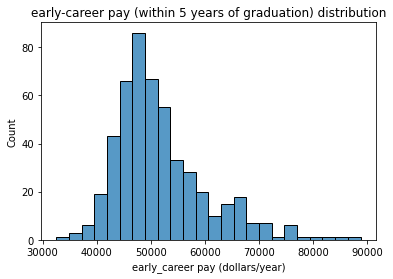

In [34]:
sns.histplot(x = "early_career_pay", data = data_cleaned)
plt.xlabel("early_career pay (dollars/year)")
plt.title("early-career pay (within 5 years of graduation) distribution")

The distribution of early_career_pay is slightly skew to the right but generally normal. 

Text(0.5, 1.0, 'the distribution of admission rate 2009-2018 average')

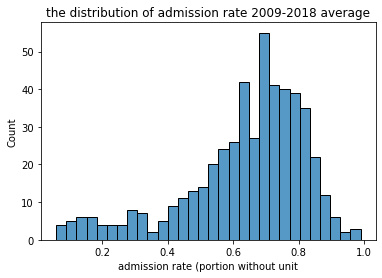

In [35]:
sns.histplot(x = "admission_rate_avg", data = data_cleaned, bins = 30)
plt.xlabel("admission rate (portion without unit")
plt.title("the distribution of admission rate 2009-2018 average")

The distribution of admission_rate_avg is slightly skew to the left but generally normal. 

Text(0.5, 1.0, 'the distribution of SAT score 2009-2018 average')

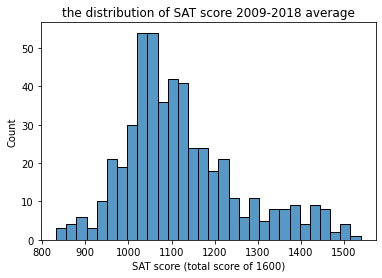

In [36]:
sns.histplot(x = "sat_avg", data = data_cleaned, bins = 30)
plt.xlabel("SAT score (total score of 1600)")
plt.title("the distribution of SAT score 2009-2018 average")

The distribution of sat_avg is generally normal. 

Text(0.5, 1.0, 'the distribution of cost of attendance (for 4-year graduation) 2009-2018 average')

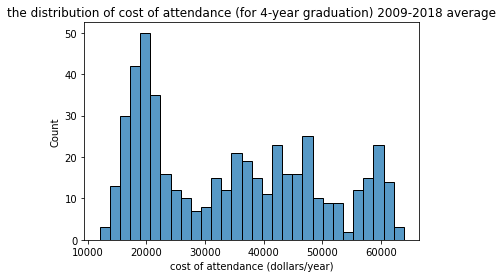

In [37]:
sns.histplot(x = "cost_of_attendance_avg", data = data_cleaned, bins = 30)
plt.xlabel("cost of attendance (dollars/year)")
plt.title("the distribution of cost of attendance (for 4-year graduation) 2009-2018 average")

The distribution of cost_of_attendance_avg is not even close to normal because of multiple peaks. 

Text(0.5, 1.0, 'the distribution of cost of attendance (for 4-year graduation) 2009-2018 average')

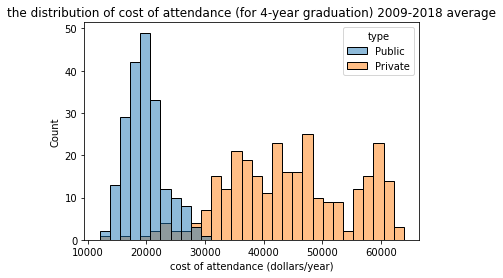

In [38]:
sns.histplot(x = "cost_of_attendance_avg", data = data_cleaned, bins = 30, hue="type")
plt.xlabel("cost of attendance (dollars/year)")
plt.title("the distribution of cost of attendance (for 4-year graduation) 2009-2018 average")

The distribution of cost_of_attendance_avg of public schools is generally normal, slightly skew to the right.  
The distribution of cost_of_attendance_avg of private schools is binomial because of the drastically decreased count from 50000 to 55000 dollars/year. This can possbly be caused by subgroups within the private schools such that certain schools are extremly expensive. 

Since the cost of attendance is the independent variable and there is no assumptions about the normal distribution of the independent variables, we can use raw data of cost of attendance for analysis. 

### Linear Regression
We now start to analyze the relationship between average cost of attendance and early career pay in a scatter plot. 

We first take a look at the general trend without separating school types, which are identified as having multicollinearity with and disrupting the distribution of cost of attendance.

Text(0.5, 1.0, 'the relationship of early-career pay vs. cost of attendance in linear regression model')

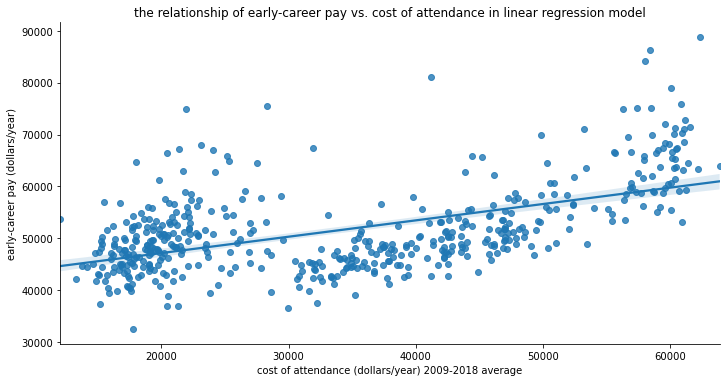

In [39]:
sns.lmplot(x = "cost_of_attendance_avg", y = "early_career_pay", data = data_cleaned, aspect = 2)
plt.xlabel("cost of attendance (dollars/year) 2009-2018 average")
plt.ylabel("early-career pay (dollars/year)")
plt.title("the relationship of early-career pay vs. cost of attendance in linear regression model")

It seems like there are two clusters in the graph, possibly due to the difference in cost of attendance between public schools and private schools. We first run the linear regression analysis without considering school types to see the general trend.

In [40]:
outcome_early, predictors_early = patsy.dmatrices("early_career_pay ~ cost_of_attendance_avg", data_cleaned)
mod_early = sm.OLS(outcome_early, predictors_early)
res_early = mod_early.fit()
print(res_early.summary())

                            OLS Regression Results                            
Dep. Variable:       early_career_pay   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     214.5
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.34e-40
Time:                        15:26:54   Log-Likelihood:                -5097.9
No. Observations:                 496   AIC:                         1.020e+04
Df Residuals:                     494   BIC:                         1.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4.08

The R-squared is relatively small, meaning there is a majority of variablities in early_career_pay not explained by cost_of_attendance_avg, possibly including the school types. 

We look at the school types of data in the left cluster. 

In [41]:
low_cost_cluster = data_cleaned[(data_cleaned["cost_of_attendance_avg"] < 30000)]
low_cost_cluster["type"].value_counts()

Public     202
Private     19
Name: type, dtype: int64

In [42]:
data_cleaned["type"].value_counts()

Private    294
Public     202
Name: type, dtype: int64

It seems that all public schools and a small number of private schools are in the low-cost cluster. The graph below further shows the distribution difference. We run another regression analysis to further confirm the influence of school types on grouping the cost_of_attendance, which further influences early_career_pay. 

Text(0.5, 1.0, 'the relationship of early-career pay and school types vs. cost of attendance seperated by school types')

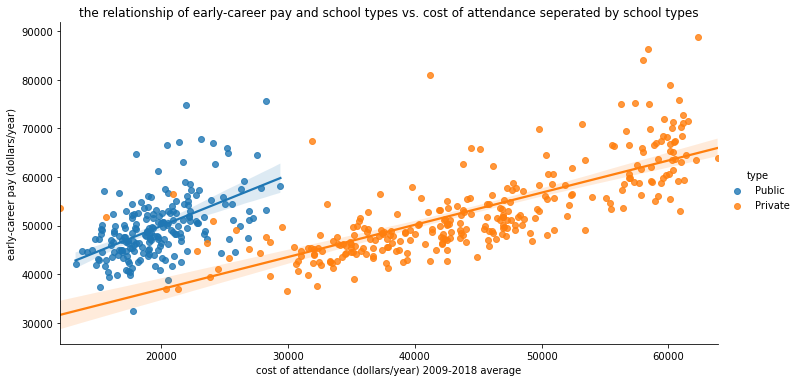

In [43]:
sns.lmplot(x = "cost_of_attendance_avg", y = "early_career_pay", data = data_cleaned, aspect = 2, hue = "type")
plt.xlabel("cost of attendance (dollars/year) 2009-2018 average")
plt.ylabel("early-career pay (dollars/year)")
plt.title("the relationship of early-career pay and school types vs. cost of attendance seperated by school types")

After performing analysis considering the school types, the slopes of linear regression line seem larger than that without considering the school types. 

In [44]:
outcome_early_type, predictors_early_type = patsy.dmatrices("early_career_pay ~ cost_of_attendance_avg + type", data_cleaned)
mod_early_type = sm.OLS(outcome_early_type, predictors_early_type)
res_early_type = mod_early_type.fit()
print(res_early_type.summary())

                            OLS Regression Results                            
Dep. Variable:       early_career_pay   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     248.8
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           2.02e-75
Time:                        15:26:55   Log-Likelihood:                -5014.3
No. Observations:                 496   AIC:                         1.003e+04
Df Residuals:                     493   BIC:                         1.005e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.26

A big increase in R-squared confirms our hypothesis that school type accounts for the left-out variability in the previous regression model of using the cost_of_attendance_avg as the only independent variable. 

We now analyze another potentially confounding variable sat_avg. We draw two graphs, considering school types or not, to understand the influence of school types on SAT score. 

Text(0.5, 1.0, 'the relationship of early-career pay vs. SAT score in linear regression model')

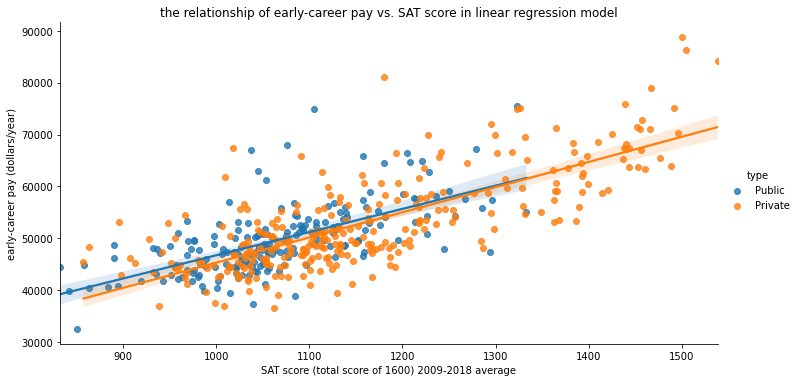

In [87]:
sns.lmplot(x = "sat_avg", y = "early_career_pay", data = data_cleaned, aspect = 2, hue="type")
plt.xlabel("SAT score (total score of 1600) 2009-2018 average")
plt.ylabel("early-career pay (dollars/year)")
plt.title("the relationship of early-career pay vs. SAT score in linear regression model separated by school types")

The same graph without grouping:

Text(0.5, 1.0, 'the relationship of early-career pay vs. SAT score in linear regression model')

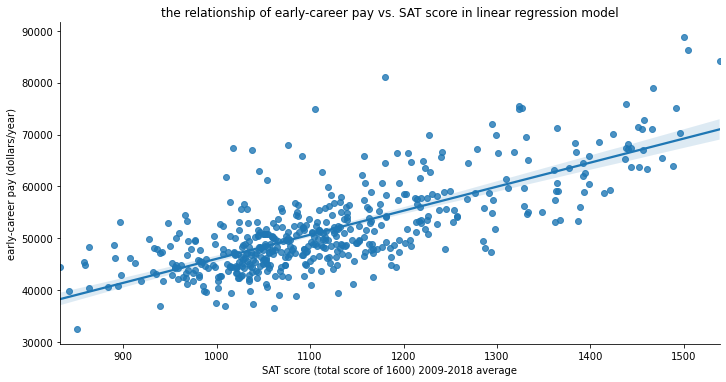

In [45]:
sns.lmplot(x = "sat_avg", y = "early_career_pay", data = data_cleaned, aspect = 2)
plt.xlabel("SAT score (total score of 1600) 2009-2018 average")
plt.ylabel("early-career pay (dollars/year)")
plt.title("the relationship of early-career pay vs. SAT score in linear regression model")

With or without grouping, the slope of relationship between early-career pay and SAT score in 2009-2018 is similar. 

The dots seem somewhat scattered sparsely around the regression line.  
The regression line is not close to flat such that slope equals zero, so there is a relationship between SAT score and early-career pay to confound the relationship of cost of attendance and early-career pay & school types. To confirm it, we perform statistical analysis.  

In [46]:
outcome_early_type_SAT, predictors_early_type_SAT = patsy.dmatrices("early_career_pay ~ cost_of_attendance_avg + type + sat_avg", data_cleaned)
mod_early_type_SAT = sm.OLS(outcome_early_type_SAT, predictors_early_type_SAT)
res_early_type_SAT = mod_early_type_SAT.fit()
print(res_early_type_SAT.summary())

                            OLS Regression Results                            
Dep. Variable:       early_career_pay   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     255.6
Date:                Sun, 13 Mar 2022   Prob (F-statistic):          5.97e-100
Time:                        15:26:56   Log-Likelihood:                -4954.3
No. Observations:                 496   AIC:                             9917.
Df Residuals:                     492   BIC:                             9933.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1532

A small increase in R-squared demonstrates that sat score accounts for more left-over variability in the previous regression model of using the cost_of_attendance_avg and school type as independent variables. 

We now analyze another potentially confounding variable admission_rate. We draw two graphs, considering school types or not, to understand the influence of school types on SAT score. 

Text(0.5, 1.0, 'the relationship of early-career pay vs. admission rate in linear regression model')

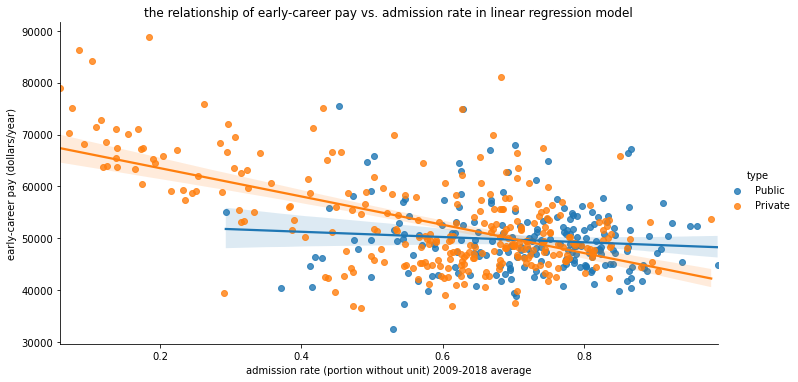

In [88]:
sns.lmplot(x = "admission_rate_avg", y = "early_career_pay", data = data_cleaned, aspect = 2, hue="type")
plt.xlabel("admission rate (portion without unit) 2009-2018 average")
plt.ylabel("early-career pay (dollars/year)")
plt.title("the relationship of early-career pay vs. admission rate in linear regression model separated by school types")

The same graph without grouping:

Text(0.5, 1.0, 'the relationship of early-career pay vs. admission rate in linear regression model')

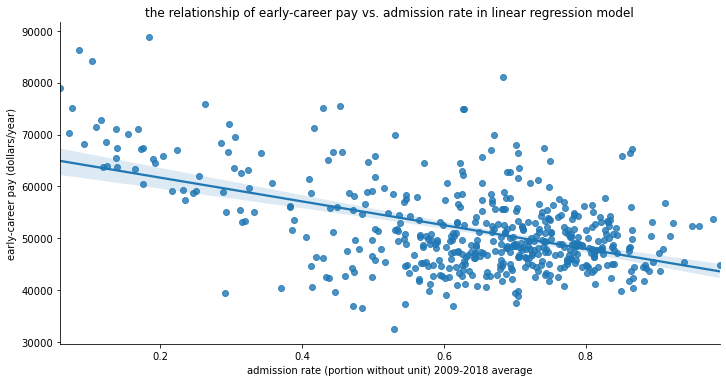

In [47]:
sns.lmplot(x = "admission_rate_avg", y = "early_career_pay", data = data_cleaned, aspect = 2)
plt.xlabel("admission rate (portion without unit) 2009-2018 average")
plt.ylabel("early-career pay (dollars/year)")
plt.title("the relationship of early-career pay vs. admission rate in linear regression model")

With or without grouping, the slope of relationship between early-career pay and admission rate in 2009-2018 is not very similar. 

The dots seem scattered sparsely around the regression line.  
The regression line is close to flat such that slope equals zero, so there is possibly no relationship between admission rate and early-career pay to confound the relationship of cost of attendance and early-career pay & school types & SAT score. To confirm it, we perform statistical analysis.  

In [48]:
outcome_early_type_SAT_ADM, predictors_early_type_SAT_ADM = patsy.dmatrices("early_career_pay ~ cost_of_attendance_avg + type + sat_avg + admission_rate_avg", data_cleaned)
mod_early_type_SAT_ADM = sm.OLS(outcome_early_type_SAT_ADM, predictors_early_type_SAT_ADM)
res_early_type_SAT_ADM = mod_early_type_SAT_ADM.fit()
print(res_early_type_SAT_ADM.summary())

                            OLS Regression Results                            
Dep. Variable:       early_career_pay   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     191.6
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           8.13e-99
Time:                        15:26:57   Log-Likelihood:                -4954.1
No. Observations:                 496   AIC:                             9918.
Df Residuals:                     491   BIC:                             9939.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3266

A very small increase in R-squared demonstrates that admission rate does not account for left-over variability much in the previous regression model of using the cost_of_attendance_avg, school type, and admission_rate_avg as independent variables. 

We can conclude from this linear regression analysis using all independent variables that the school type, cost of attendance 2009-2018 average, and SAT score 2009-2018 average have a significant linear relationship with the dependent variable early-career pay due to their p-values smaller than 0.000. However, p-value of 0.484, larger than 0.05, for admission rate 2009-2018 average shows no significant linear relationship. 

### Outlier Analysis
In chronological trend section, we identified some outliers across time within the same variable and made some hypothesis about them. We will mark them with distinguishable colors in the scatter plot to see whether they acts like outliers in the relation with the early-career pay to test our hypothesis. 

We first look at the outliers we found in the chronological sat_avg trend analysis: University of West Alabama and Tougaloo College. 

Legand?

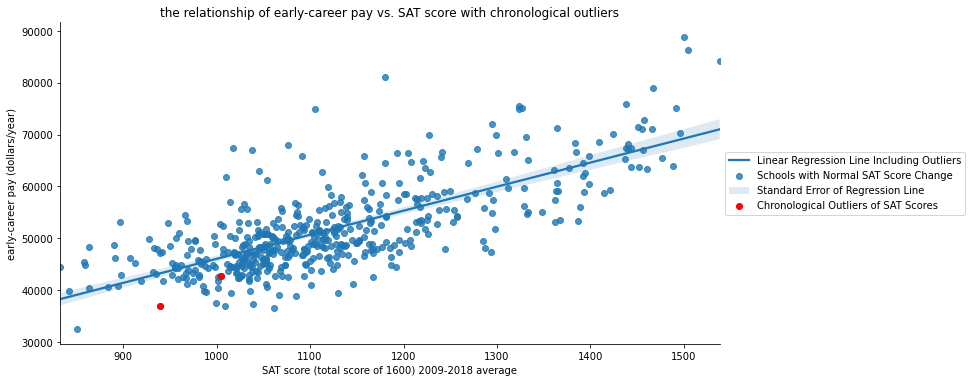

In [49]:
# mark University of West Alabama (index 12) and Tougaloo College (index 252) red
sns.lmplot(x = "sat_avg", y = "early_career_pay", data = data_cleaned, aspect = 2)
plt.scatter(data_cleaned.iloc[12]["sat_avg"], data_cleaned.iloc[12]["early_career_pay"], color='red')
plt.scatter(data_cleaned.iloc[252]["sat_avg"], data_cleaned.iloc[252]["early_career_pay"], color='red')

plt.xlabel("SAT score (total score of 1600) 2009-2018 average")
plt.ylabel("early-career pay (dollars/year)")
plt.title("the relationship of early-career pay vs. SAT score with chronological outliers")
plt.legend(["Linear Regression Line Including Outliers","Schools with Normal SAT Score Change","Standard Error of Regression Line","Chronological Outliers of SAT Scores"], loc='center left', bbox_to_anchor=(1, 0.5))

These universities don't seem to become the outliers in our regression analysis. This shows that even though they don't follow a linear SAT score trend over time by showing a significant decrease of SAT score from 2009 to 09-18 average, they follow the general correlation between average SAT score and early-career pay. 

We then look at the outlier we found in the chronological admission_rate_avg trend analysis: Delta State University.

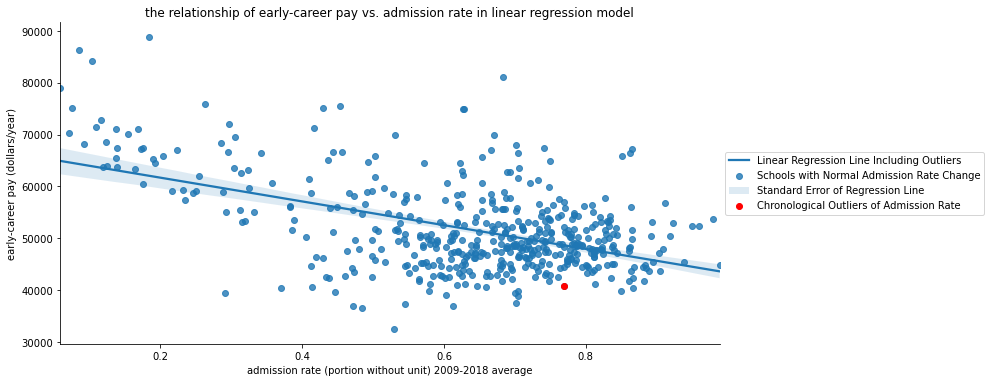

In [50]:
# mark Delta State University (index 248) red
sns.lmplot(x = "admission_rate_avg", y = "early_career_pay", data = data_cleaned, aspect = 2)
plt.scatter(data_cleaned.iloc[248]["admission_rate_avg"], data_cleaned.iloc[248]["early_career_pay"], color='red')

plt.xlabel("admission rate (portion without unit) 2009-2018 average")
plt.ylabel("early-career pay (dollars/year)")
plt.title("the relationship of early-career pay vs. admission rate in linear regression model")
plt.legend(["Linear Regression Line Including Outliers","Schools with Normal Admission Rate Change","Standard Error of Regression Line","Chronological Outliers of Admission Rate"], loc='center left', bbox_to_anchor=(1, 0.5))

This university doesn't seem to become the outliers in our regression analysis. This shows that even though it doesn't follow a linear admission rate trend over time by showing an enormous increase in admission rate over 2009-2018, its average admission rate follows the general correlation with early-career pay.

Recall that in our distribution graph between cost_of_attendance and early_career_pay, there are a few private-school outliers with early-career pay a lot higher than other private schools. We now define a condition to filter out all private schools with actual early-career pay much higher (over $20000) than the regression line. 

In [51]:
private_outlier_ec = data_cleaned[(data_cleaned["type"] == "Private") & (data_cleaned["cost_of_attendance_avg"] * 0.686 + 22600 < data_cleaned["early_career_pay"] - 20000)]
private_outlier_ec

,name,early_career_pay,mid_career_pay,type,admission_rate_avg,sat_avg,cost_of_attendance_avg,admission_rate_9,avg_SAT_9,avg_cost_9
28,harvey mudd college,88800,158200,Private,0.18387,1500.1,62309.9,0.3205,1490.0,50306.0
29,california institute of technology,84100,151600,Private,0.10398,1538.4,57981.0,0.1527,1514.0,48990.0
98,brigham young university-idaho,53700,93500,Private,0.97967,1065.5,12028.5,0.9705,1050.0,12288.0
192,capitol technology university,67400,118400,Private,0.74159,1017.6,31882.9,0.8109,870.0,29762.0
202,massachusetts institute of technology,86300,155200,Private,0.08564,1504.4,58379.8,0.1070,1472.0,50100.0
296,albany college of pharmacy and health sciences,81000,144800,Private,0.68291,1179.7,41224.6,0.6623,1188.0,34854.0


For each of the schools above, we paint it pink in the distribution graph, and observe its information.

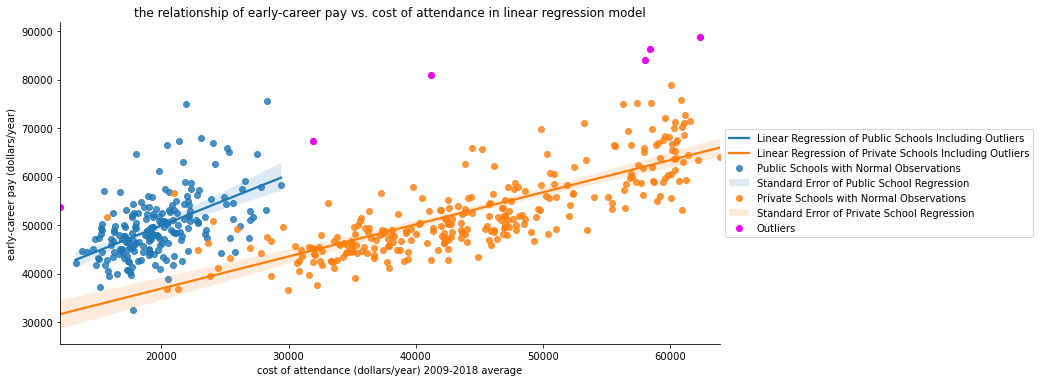

In [52]:
sns.lmplot(x = "cost_of_attendance_avg", y = "early_career_pay", data = data_cleaned, aspect = 2, hue = "type", legend=False)
index_list = private_outlier_ec.index.tolist()
for index in index_list:
    plt.scatter(data_cleaned.iloc[index]["cost_of_attendance_avg"], data_cleaned.iloc[index]["early_career_pay"], color='#ea00ff')
plt.xlabel("cost of attendance (dollars/year) 2009-2018 average")
plt.ylabel("early-career pay (dollars/year)")
plt.title("the relationship of early-career pay vs. cost of attendance in linear regression model")
plt.legend(["Linear Regression of Public Schools Including Outliers","Linear Regression of Private Schools Including Outliers","Public Schools with Normal Observations","Standard Error of Public School Regression","Private Schools with Normal Observations","Standard Error of Private School Regression","Outliers"], loc='center left', bbox_to_anchor=(1, 0.5))

In early-career regression, the outliers in private schools are away from but scattered along the whole length of the regression line of private schools, inferring that removing them can effectively increase r-squared because more variablity can be explained by cost of attendance and decrease standard error of the slope to have a more significant linear relationship, which does not matter a lot since the relationship is already significant, but the slope will not change much because these outliers forms a line having similar slope of the private schools as a whole. 

Overall, whatever public school or private school, it showed a statistically significant positive relationship between the average cost of attendance and the early career pay of graduated student. Which mathes our hypothesis.

# Mid Career Pay Analysis

Similar to the previous analysis, we now do the inferential analysis on the independent variables related to the mid career pay. They are the average admission rate, SAT average, cost of attendance particularly in 2008.

## Multi-Collinearity Analysis by Variance Inflation Factor (VIF)

Now, we will use VIF to detect multi-collinearity between variables.

In [53]:
#find design matrix for linear regression model using 'rating' as response variable 

outcome_mc_SAT_ADM, predictors_mc_SAT_ADM = patsy.dmatrices("mid_career_pay ~ avg_cost_9 + type + avg_SAT_9 + admission_rate_9", data=data_cleaned, return_type='dataframe')

#calculate VIF for each explanatory variable
vif_mc = pd.DataFrame()
vif_mc['VIF'] = [vif(predictors_mc_SAT_ADM.values, i) for i in range(predictors_mc_SAT_ADM.shape[1])]
vif_mc['variable'] = predictors_mc_SAT_ADM.columns

#view VIF for each explanatory variable 
vif_mc

,VIF,variable
0,151.788838,Intercept
1,3.590058,type[T.Public]
2,5.723921,avg_cost_9
3,2.276367,avg_SAT_9
4,1.410139,admission_rate_9


Similar to the early-career analysis, most of the VIF values are below 5 except for the avg_cost_9, there is potentially severe correlation between the cost of attendance and other explanatory variables. A potential reason may be the effect of school type on the cost of attendance. Therefore, we'll analyze and do regression on different school types separately.

In [54]:
#find design matrix for linear regression model using 'rating' as response variable 

outcome_mc_SAT_ADM_pub, predictors_mc_SAT_ADM_pub = patsy.dmatrices("mid_career_pay ~ avg_cost_9 + avg_SAT_9 + admission_rate_9", data=data_public, return_type='dataframe')

#calculate VIF for each explanatory variable
vif_mc_pub = pd.DataFrame()
vif_mc_pub['VIF'] = [vif(predictors_mc_SAT_ADM_pub.values, i) for i in range(predictors_mc_SAT_ADM_pub.shape[1])]
vif_mc_pub['variable'] = predictors_mc_SAT_ADM_pub.columns

#view VIF for each explanatory variable 
vif_mc_pub

,VIF,variable
0,143.094976,Intercept
1,1.142004,avg_cost_9
2,1.126994,avg_SAT_9
3,1.015903,admission_rate_9


The VIF values above does not show any severe correlation. We will do another VIF on private school.

In [55]:
#find design matrix for linear regression model using 'rating' as response variable 

outcome_mc_SAT_ADM, predictors_mc_SAT_ADM = patsy.dmatrices("mid_career_pay ~ avg_cost_9 + avg_SAT_9 + admission_rate_9", data=data_private, return_type='dataframe')

#calculate VIF for each explanatory variable
vif_mc = pd.DataFrame()
vif_mc['VIF'] = [vif(predictors_mc_SAT_ADM.values, i) for i in range(predictors_mc_SAT_ADM.shape[1])]
vif_mc['variable'] = predictors_mc_SAT_ADM.columns

#view VIF for each explanatory variable 
vif_mc

,VIF,variable
0,175.121727,Intercept
1,2.358624,avg_cost_9
2,2.845235,avg_SAT_9
3,1.692781,admission_rate_9


For private schools, the VIF values stiill does not show severe correlation.

**Conclusion:**
After considering school type, all VIF values are less than 5, so there's no obvious multicollinearity among our independent variables.Comparing three VIF analysis above, we can tell that the school type has some collinearity with cost of attendance, so we'll analyze on separate types in the future. 

## Distribution

Now let's do the similar analysis for mid career pay. We'll first check the distribution of data.

Text(0.5, 1.0, 'mid-career pay (10 years after graduation) distribution')

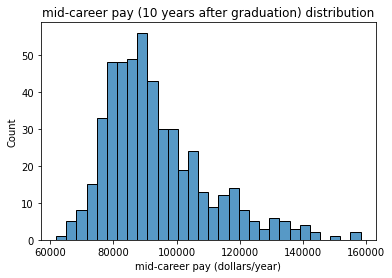

In [56]:
sns.histplot(x = "mid_career_pay", data = data_cleaned, bins = 30)
plt.xlabel("mid-career pay (dollars/year)")
plt.title("mid-career pay (10 years after graduation) distribution")

The distribution of mid career pay is skewed to right. 

Text(0.5, 1.0, 'the distribution of admission rate 2009')

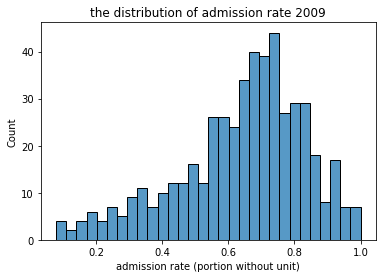

In [57]:
sns.histplot(x = "admission_rate_9", data = data_cleaned, bins = 30)
plt.xlabel("admission rate (portion without unit)")
plt.title("the distribution of admission rate 2009")

The distribution of admission_rate_9 (9 stands for 2009) is slightly skewed to left but generally normal.

Text(0.5, 1.0, 'the distribution of SAT score 2009')

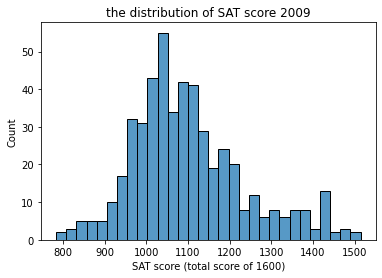

In [58]:
sns.histplot(x = "avg_SAT_9", data = data_cleaned, bins = 30)
plt.xlabel("SAT score (total score of 1600)")
plt.title("the distribution of SAT score 2009")

The distribution of avg_SAT_9 score is generally normal.

We are spotting a similar distribution of average cost of attendance in 2009, and as we assumed, it may be related to the categorical variable type.

Text(0.5, 1.0, 'the distribution of cost of attendance (for 4-year graduation) 2009')

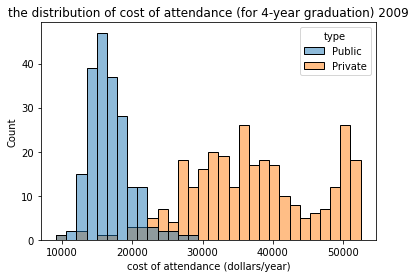

In [59]:
sns.histplot(x = "avg_cost_9", data = data_cleaned, bins = 30, hue = 'type')
plt.xlabel("cost of attendance (dollars/year)")
plt.title("the distribution of cost of attendance (for 4-year graduation) 2009")

The distribution of average cost of attendance of public school is generally normal. but the distribution of average cost of attendance of private school is not close to normal since the distribution of private school has multiple peak.

## Linear Regression

Now let's analyze the relationship between average cost of attendance and mid career pay in a scatter plot.

For the same reason as in early-career analysis, we first take a look at the general trend without separating school types. 

Text(0.5, 1.0, 'the relationship of mid-career pay vs. cost of attendance in linear regression model')

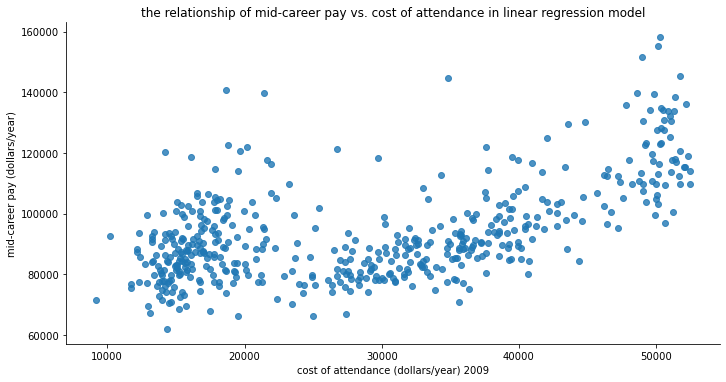

In [60]:
sns.lmplot(x = "avg_cost_9", y = "mid_career_pay", data = data_cleaned, aspect = 2, fit_reg = False)
plt.xlabel("cost of attendance (dollars/year) 2009")
plt.ylabel("mid-career pay (dollars/year)")
plt.title("the relationship of mid-career pay vs. cost of attendance in linear regression model")

Similar to the early career pay, it looks like two clusters in the graph and the reason may also be the school type.

In [61]:
outcome_mid, predictors_mid = patsy.dmatrices("mid_career_pay ~ avg_cost_9", data_cleaned)
mod_mid = sm.OLS(outcome_mid, predictors_mid)
res_mid = mod_mid.fit()
print(res_mid.summary())

                            OLS Regression Results                            
Dep. Variable:         mid_career_pay   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     231.0
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           4.43e-43
Time:                        15:27:01   Log-Likelihood:                -5416.4
No. Observations:                 496   AIC:                         1.084e+04
Df Residuals:                     494   BIC:                         1.085e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.223e+04   1531.425     47.165      0.0

The R-squared of mid-career pay is relatively small, so there is a majority of variablities in mid_career_pay not explained by avg_cost_9 and the school types may be the reason.

Then, we observe the scatter plot that were diffrentiatedby school type.

Text(0.5, 1.0, 'the relationship of mid-career pay and school types vs. cost of attendance seperated by school types')

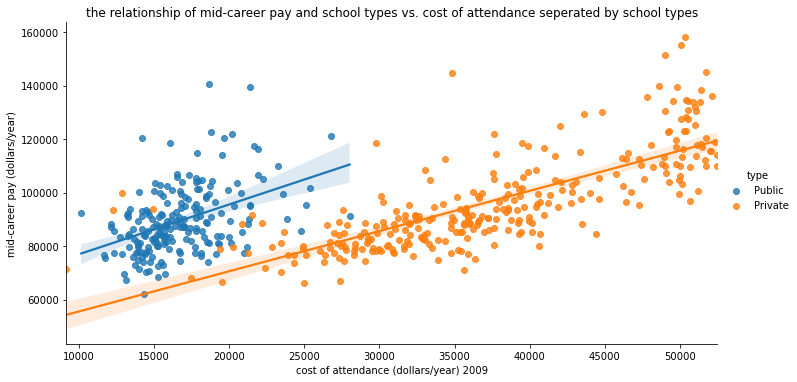

In [62]:
sns.lmplot(x = "avg_cost_9", y = "mid_career_pay", data = data_cleaned, aspect = 2, hue = 'type')
plt.xlabel("cost of attendance (dollars/year) 2009")
plt.ylabel("mid-career pay (dollars/year)")
plt.title("the relationship of mid-career pay and school types vs. cost of attendance seperated by school types")

Observing the graph, the cluster of privtate school seems to have a better linear regression than the cluster of public school. We will seperate them into two graphs for further analysis.

Text(0.5, 1.0, 'the relationship of mid-career pay vs. cost of attendance for private schools')

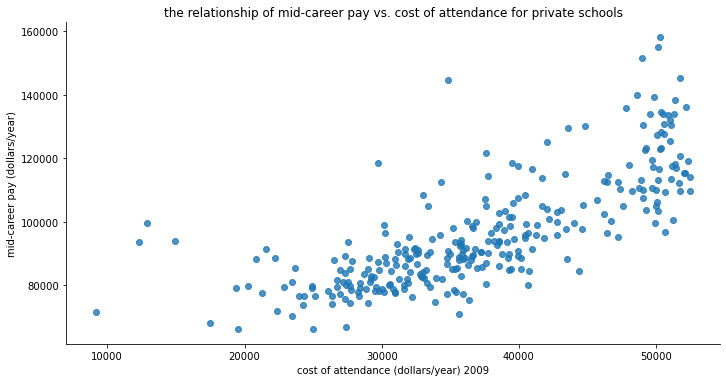

In [63]:
sns.lmplot(x = "avg_cost_9", y = "mid_career_pay", data = data_private, aspect = 2, fit_reg = False)
plt.xlabel("cost of attendance (dollars/year) 2009")
plt.ylabel("mid-career pay (dollars/year)")
plt.title("the relationship of mid-career pay vs. cost of attendance for private schools")

We zoomed in the scatter plot for only the private school to observe if it seems to have a linear regression.

In [64]:
outcome_mid_type, predictors_mid_type = patsy.dmatrices("mid_career_pay ~ avg_cost_9", data_private)
mod_mid_type = sm.OLS(outcome_mid_type, predictors_mid_type)
res_mid_type = mod_mid_type.fit()
print(res_mid_type.summary())

                            OLS Regression Results                            
Dep. Variable:         mid_career_pay   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     408.2
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           2.14e-57
Time:                        15:27:02   Log-Likelihood:                -3165.1
No. Observations:                 294   AIC:                             6334.
Df Residuals:                     292   BIC:                             6342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.05e+04   2849.383     14.214      0.0

The R-squared is higher than the previous one which includes both private and public schools. This indicates the influence of school types on mid_career_pay.

Text(0.5, 1.0, 'the relationship of mid-career pay vs. cost of attendance for public schools')

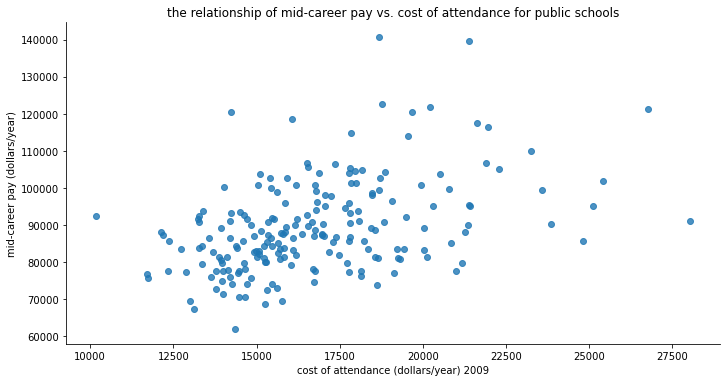

In [65]:
sns.lmplot(x = "avg_cost_9", y = "mid_career_pay", data = data_public, aspect = 2, fit_reg = False)
plt.xlabel("cost of attendance (dollars/year) 2009")
plt.ylabel("mid-career pay (dollars/year)")
plt.title("the relationship of mid-career pay vs. cost of attendance for public schools")

We zoomed in the scatter plot for only the public school to observe if it seems like a linear regression.

In [66]:
outcome_mid_type, predictors_mid_type = patsy.dmatrices("mid_career_pay ~ avg_cost_9", data_public)
mod_mid_type = sm.OLS(outcome_mid_type, predictors_mid_type)
res_mid_type = mod_mid_type.fit()
print(res_mid_type.summary())

                            OLS Regression Results                            
Dep. Variable:         mid_career_pay   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     45.78
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.43e-10
Time:                        15:27:02   Log-Likelihood:                -2172.6
No. Observations:                 202   AIC:                             4349.
Df Residuals:                     200   BIC:                             4356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.829e+04   4686.704     12.438      0.0

The R-squared representing the relationship between mid_career_pay and avg_cost in the dataset of public school is significantly lower than the R -squared representing the relationship between mid_career_pay and avg_cost in the dataset of private school. This may indicates that cost of attendace has a bigger influence on mid-career pay for private school.

Then, we run the OLS regression test again with school types as one more consideration.

In [67]:
outcome_mid_type, predictors_mid_type = patsy.dmatrices("mid_career_pay ~ avg_cost_9 + type", data_cleaned)
mod_mid_type = sm.OLS(outcome_mid_type, predictors_mid_type)
res_mid_type = mod_mid_type.fit()
print(res_mid_type.summary())

                            OLS Regression Results                            
Dep. Variable:         mid_career_pay   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     248.9
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.86e-75
Time:                        15:27:03   Log-Likelihood:                -5338.5
No. Observations:                 496   AIC:                         1.068e+04
Df Residuals:                     493   BIC:                         1.070e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        3.96e+04   2749.492     14.

To further validate our hypothesis and explore other relevant variables affecting hypothesis, we We model the relationship between average SAT score and mid-career income. We draw two graphs, considering school types or not, to understand the influence of school types on SAT score. 

Text(0.5, 1.0, 'the relationship of mid-career pay vs. SAT score in linear regression model seperated by school types')

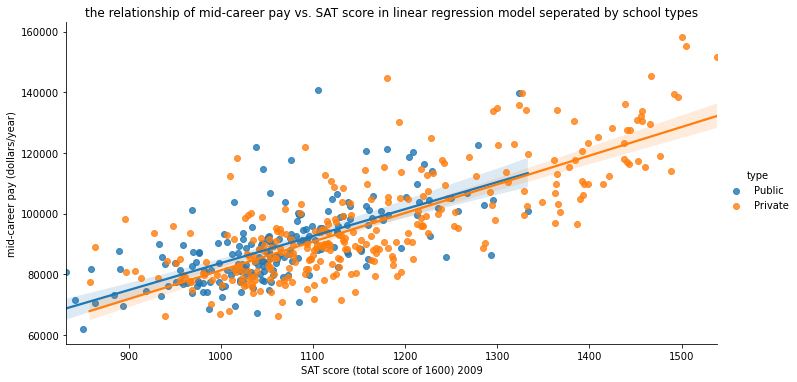

In [68]:
sns.lmplot(x = "sat_avg", y = "mid_career_pay", data = data_cleaned, hue = 'type', aspect = 2)
plt.xlabel("SAT score (total score of 1600) 2009")
plt.ylabel("mid-career pay (dollars/year)")
plt.title("the relationship of mid-career pay vs. SAT score in linear regression model seperated by school types")

The same graph without grouping:

Text(0.5, 1.0, 'the relationship of mid-career pay vs. SAT score in linear regression model seperated by school types')

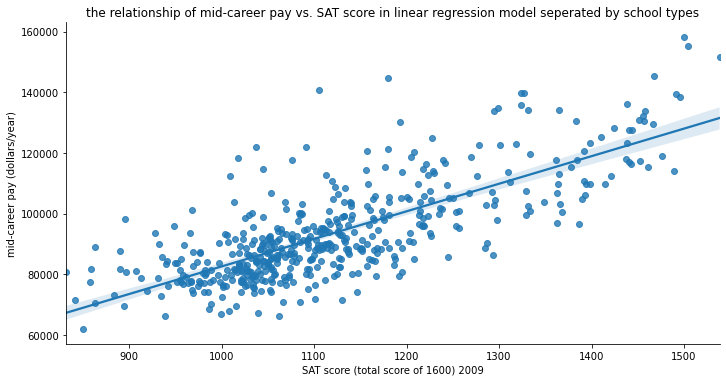

In [86]:
# without grouping
sns.lmplot(x = "sat_avg", y = "mid_career_pay", data = data_cleaned, aspect = 2)
plt.xlabel("SAT score (total score of 1600) 2009")
plt.ylabel("mid-career pay (dollars/year)")
plt.title("the relationship of mid-career pay vs. SAT score in linear regression model")

With or without grouping, the slope of relationship between mid-career pay and SAT scores in 2009 is almost the same. 

We take a look at the scatter plot to observe the relationship between sat_avg and mid_career_pay.

In [69]:
outcome_mid_type_SAT, predictors_mid_type_SAT = patsy.dmatrices("mid_career_pay ~ avg_cost_9 + type + avg_SAT_9", data_cleaned)
mod_mid_type_SAT = sm.OLS(outcome_mid_type_SAT, predictors_mid_type_SAT)
res_mid_type_SAT = mod_mid_type_SAT.fit()
print(res_mid_type_SAT.summary())

                            OLS Regression Results                            
Dep. Variable:         mid_career_pay   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           8.14e-97
Time:                        15:27:04   Log-Likelihood:                -5285.9
No. Observations:                 496   AIC:                         1.058e+04
Df Residuals:                     492   BIC:                         1.060e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2292.0503   4255.806      0.

We run the OLS test again with one more factor (avg_SAT_9) considered, and the R-squared value is higher than the previous R-squared value (avg_cost_9). which may implies average SAT score may have more influence on the mid-career pay.

Then, we check the relationship between admission rate and mid-career pay. We draw two graphs, considering school types or not, to understand the influence of school types on admission rate. 

Text(0.5, 1.0, 'the relationship of mid-career pay vs. admission rate in linear regression model seperated by school types')

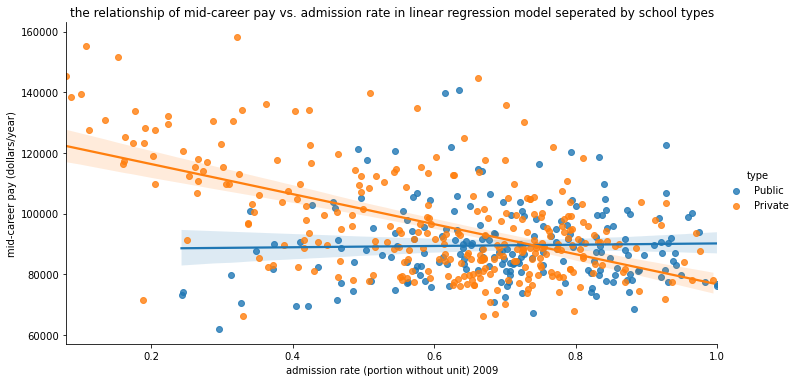

In [70]:
sns.lmplot(x = "admission_rate_9", y = "mid_career_pay", data = data_cleaned, aspect = 2, hue = "type")
plt.xlabel("admission rate (portion without unit) 2009")
plt.ylabel("mid-career pay (dollars/year)")
plt.title("the relationship of mid-career pay vs. admission rate in linear regression model seperated by school types")

The same graph without grouping:

Text(0.5, 1.0, 'the relationship of mid-career pay vs. admission rate in linear regression model seperated by school types')

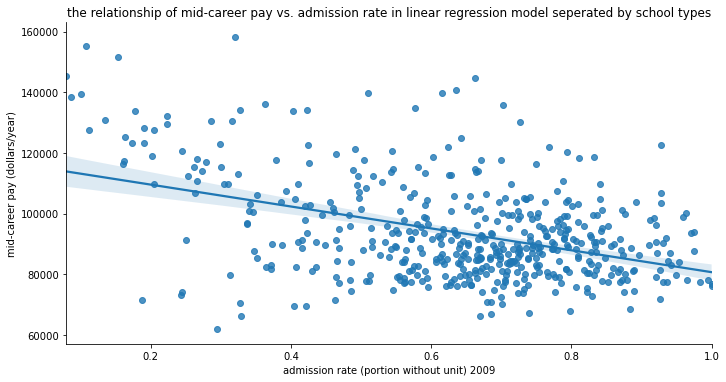

In [85]:
# without grouping
sns.lmplot(x = "admission_rate_9", y = "mid_career_pay", data = data_cleaned, aspect = 2)
plt.xlabel("admission rate (portion without unit) 2009")
plt.ylabel("mid-career pay (dollars/year)")
plt.title("the relationship of mid-career pay vs. admission rate in linear regression model")

With or without grouping, the slope of relationship between mid-career pay and admission rate in 2009 is not very similar. 

We take a look at the scatter plot to observe the relationship between admission_rate_9 and mid_career_pay.

The regression line of public school is close to flat, so there may not have relationship between the admission rate and mid-career pay in public school scale.

However, the regression line of private school shows a slight decreasing trend. so there may exist some negative relationship between the admission rate and mid-career pay in private school scale.

In [71]:
outcome_mid_type_SAT_ADM, predictors_mid_type_SAT_ADM = patsy.dmatrices("mid_career_pay ~ avg_cost_9 + type + avg_SAT_9 + admission_rate_9", data_cleaned)
mod_mid_type_SAT_ADM = sm.OLS(outcome_mid_type_SAT_ADM, predictors_mid_type_SAT_ADM)
res_mid_type_SAT_ADM = mod_mid_type_SAT_ADM.fit()
print(res_mid_type_SAT_ADM.summary())

                            OLS Regression Results                            
Dep. Variable:         mid_career_pay   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     182.7
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           9.65e-96
Time:                        15:27:05   Log-Likelihood:                -5285.5
No. Observations:                 496   AIC:                         1.058e+04
Df Residuals:                     491   BIC:                         1.060e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5526.7868   5712.295  

A small increase in R-squared value demonstrates that admission rate also does not account for the left-over variability much in the previous regression model.

Hence, we can conclude from this linear regression analysis there are significant linear relationship from all independent variables that the school type, average cost of attendance, and average SAT score with the dependent variable early-career pay since the p-value is smaller than 0.000. The p-value pf admission rate is 0.396 which is larger than 0.05, which implies there is no significant linear relationship between admission rate and mid-career pay.

## Outlier Analysis

Similar with the early-career analysis part, we identified some outliers across time with the same variable and made some hypothesis.

Then, we will mark them with distinguishable colors in the scatter plot to see whether they acts like outliers in the relation with the mid-career pay to test our hypothesis.

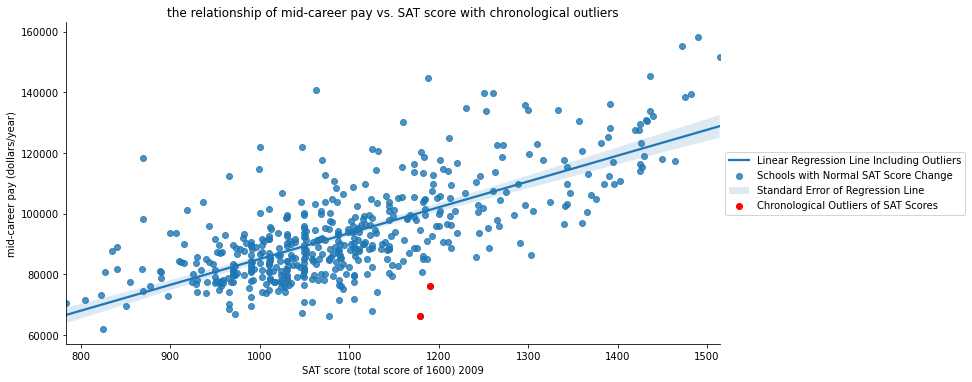

In [72]:
sns.lmplot(x = "avg_SAT_9", y = "mid_career_pay", data = data_cleaned, aspect = 2)
plt.scatter(data_cleaned.iloc[12]["avg_SAT_9"], data_cleaned.iloc[12]["mid_career_pay"], color='red')
plt.scatter(data_cleaned.iloc[252]["avg_SAT_9"], data_cleaned.iloc[252]["mid_career_pay"], color='red')

plt.xlabel("SAT score (total score of 1600) 2009")
plt.ylabel("mid-career pay (dollars/year)")
plt.title("the relationship of mid-career pay vs. SAT score with chronological outliers")
plt.legend(["Linear Regression Line Including Outliers","Schools with Normal SAT Score Change","Standard Error of Regression Line","Chronological Outliers of SAT Scores"], loc='center left', bbox_to_anchor=(1, 0.5))

We change the color of the outliers to make them more notable.

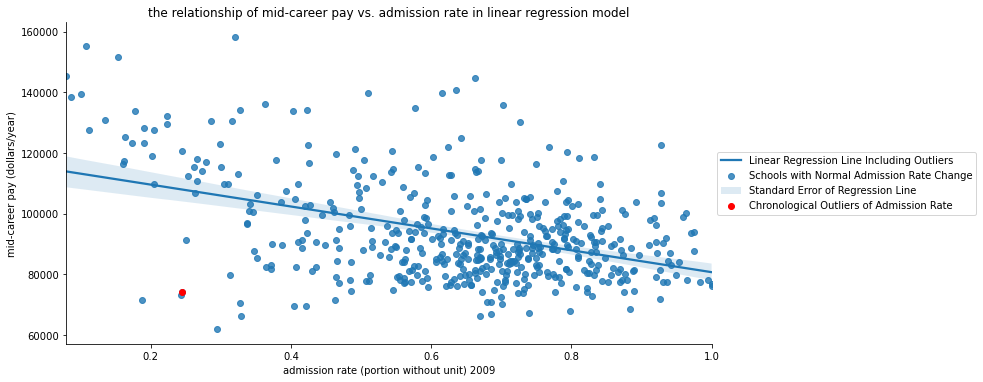

In [73]:
sns.lmplot(x = "admission_rate_9", y = "mid_career_pay", data = data_cleaned, aspect = 2)
plt.scatter(data_cleaned.iloc[248]["admission_rate_9"], data_cleaned.iloc[248]["mid_career_pay"], color='red')

plt.xlabel("admission rate (portion without unit) 2009")
plt.ylabel("mid-career pay (dollars/year)")
plt.title("the relationship of mid-career pay vs. admission rate in linear regression model")
plt.legend(["Linear Regression Line Including Outliers","Schools with Normal Admission Rate Change","Standard Error of Regression Line","Chronological Outliers of Admission Rate"], loc='center left', bbox_to_anchor=(1, 0.5))

Recall that in our distribution graph between cost_of_attendance and mid_career_pay, there are a few private-school outliers with mid-career pay a lot higher than other private schools. We now define a condition to filter out all private schools with actual mid-career pay much higher (over $20000) than the regression line. 

In [74]:
private_outlier = data_cleaned[(data_cleaned["type"] == "Private") & (data_cleaned["cost_of_attendance_avg"] * 1.50  + 40500 < data_cleaned["mid_career_pay"] - 20000)]
private_outlier

,name,early_career_pay,mid_career_pay,type,admission_rate_avg,sat_avg,cost_of_attendance_avg,admission_rate_9,avg_SAT_9,avg_cost_9
28,harvey mudd college,88800,158200,Private,0.18387,1500.1,62309.9,0.3205,1490.0,50306.0
29,california institute of technology,84100,151600,Private,0.10398,1538.4,57981.0,0.1527,1514.0,48990.0
93,brigham young university-hawaii,51700,93900,Private,0.38616,1109.1,15679.1,0.5776,1099.0,14958.0
98,brigham young university-idaho,53700,93500,Private,0.97967,1065.5,12028.5,0.9705,1050.0,12288.0
192,capitol technology university,67400,118400,Private,0.74159,1017.6,31882.9,0.8109,870.0,29762.0
202,massachusetts institute of technology,86300,155200,Private,0.08564,1504.4,58379.8,0.1070,1472.0,50100.0
296,albany college of pharmacy and health sciences,81000,144800,Private,0.68291,1179.7,41224.6,0.6623,1188.0,34854.0
332,mount carmel college of nursing,56600,99700,Private,0.73440,1029.5,20955.6,0.4833,1030.0,12911.0


Here we observe the information of the outliers.

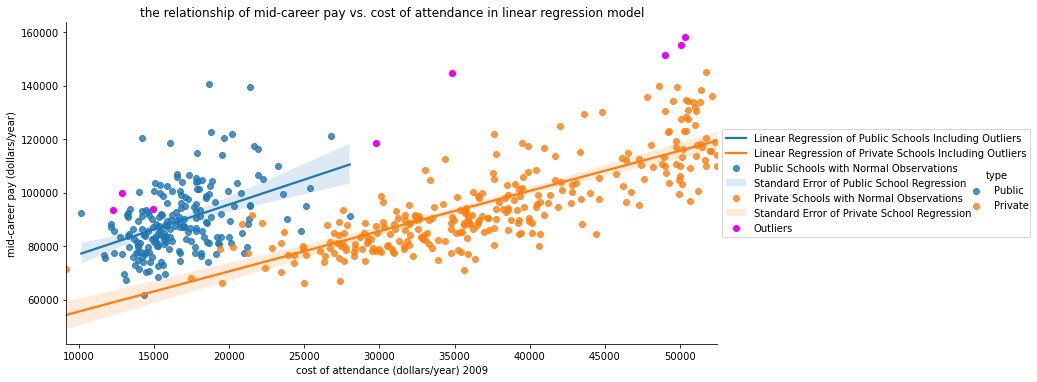

In [75]:
sns.lmplot(x = "avg_cost_9", y = "mid_career_pay", data = data_cleaned, aspect = 2, hue = "type")
index_list = private_outlier.index.tolist()
for index in index_list:
    plt.scatter(data_cleaned.iloc[index]["avg_cost_9"], data_cleaned.iloc[index]["mid_career_pay"], color='#ea00ff')

plt.xlabel("cost of attendance (dollars/year) 2009")
plt.ylabel("mid-career pay (dollars/year)")
plt.title("the relationship of mid-career pay vs. cost of attendance in linear regression model")
plt.legend(["Linear Regression of Public Schools Including Outliers","Linear Regression of Private Schools Including Outliers","Public Schools with Normal Observations","Standard Error of Public School Regression","Private Schools with Normal Observations","Standard Error of Private School Regression","Outliers"], loc='center left', bbox_to_anchor=(1, 0.5))

Overall, we can see there is also a positive relationship between mid career pay and both public and private school. But the relationship between cost of attendancy and middle career pay in private school has more obvious positive linear relationship than the relationship between cost of attendancy and middle career pay in public school.

## Predictive Analysis

We can now generate a formula that can help predict the early- and mid-career pay based on average cost of admission, school types and SAT scores, due to their statistical significance in our analysis. Further, we want to have an insight on approximately how many years it takes to earn back the money spent for 4 years of college. 

We run regressions for private vs. public schools in early-career and mid-career pay in order to get the formula. 

In [76]:
outcome_early_type_SAT_pub, predictors_early_type_SAT_pub = patsy.dmatrices("early_career_pay ~ cost_of_attendance_avg + type + sat_avg", data_public)
mod_early_type_SAT_pub = sm.OLS(outcome_early_type_SAT_pub, predictors_early_type_SAT_pub)
res_early_type_SAT_pub = mod_early_type_SAT_pub.fit()
print(res_early_type_SAT_pub.summary())

                            OLS Regression Results                            
Dep. Variable:       early_career_pay   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     93.09
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           2.90e-29
Time:                        15:27:07   Log-Likelihood:                -1994.0
No. Observations:                 202   AIC:                             3994.
Df Residuals:                     199   BIC:                             4004.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -166

In [77]:
outcome_early_type_SAT_pri, predictors_early_type_SAT_pri = patsy.dmatrices("early_career_pay ~ cost_of_attendance_avg + type + sat_avg", data_private)
mod_early_type_SAT_pri = sm.OLS(outcome_early_type_SAT_pri, predictors_early_type_SAT_pri)
res_early_type_SAT_pri = mod_early_type_SAT_pri.fit()
print(res_early_type_SAT_pri.summary())

                            OLS Regression Results                            
Dep. Variable:       early_career_pay   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     259.8
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.87e-65
Time:                        15:27:07   Log-Likelihood:                -2952.0
No. Observations:                 294   AIC:                             5910.
Df Residuals:                     291   BIC:                             5921.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               4319

In [78]:
outcome_mid_type_SAT_pub, predictors_mid_type_SAT_pub = patsy.dmatrices("mid_career_pay ~ avg_cost_9 + type + avg_SAT_9", data_public)
mod_mid_type_SAT_pub = sm.OLS(outcome_mid_type_SAT_pub, predictors_mid_type_SAT_pub)
res_mid_type_SAT_pub = mod_mid_type_SAT_pub.fit()
print(res_mid_type_SAT_pub.summary())

                            OLS Regression Results                            
Dep. Variable:         mid_career_pay   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     73.00
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.67e-24
Time:                        15:27:07   Log-Likelihood:                -2137.8
No. Observations:                 202   AIC:                             4282.
Df Residuals:                     199   BIC:                             4292.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    873.0917   7482.153      0.117      0.9

In [79]:
outcome_mid_type_SAT_pri, predictors_mid_type_SAT_pri = patsy.dmatrices("mid_career_pay ~ avg_cost_9 + type + avg_SAT_9", data_private)
mod_mid_type_SAT_pri = sm.OLS(outcome_mid_type_SAT_pri, predictors_mid_type_SAT_pri)
res_mid_type_SAT_pri = mod_mid_type_SAT_pri.fit()
print(res_mid_type_SAT_pri.summary())

                            OLS Regression Results                            
Dep. Variable:         mid_career_pay   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     259.7
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.91e-65
Time:                        15:27:07   Log-Likelihood:                -3143.1
No. Observations:                 294   AIC:                             6292.
Df Residuals:                     291   BIC:                             6303.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9107.8537   5291.325      1.721      0.0

All the previously significant variables are still significant because of their p-values less than 0.05. The followings are the resulting formulas from our linear regression.

$$
Early Career Pay = 
\begin{cases}
      -166.30 + (0.60 * Cost Of Attendance Per Year) + (35.62 * SAT avg) & \text{for public schools}\\
      4319.13 + (0.34 * Cost Of Attendance Per Year) + (29.08 * SAT avg) & \text{for private schools}\\
\end{cases}
$$


$$
Mid Career Pay = 
\begin{cases}
      873.09 + (1.12 * Cost Of Attendance Per Year) + (87.06 * SAT avg) & \text{for public schools}\\
      9107.85 + (0.96 * Cost Of Attendance Per Year) + (45.35 * SAT avg) & \text{for private schools}\\
\end{cases}
$$

For our purpose of calculating the average year needed to earn back the college tuition, we divide the total cost of 4-year college by annual career savings, represented by the career pay subtracting the living cost, if it can be done in a person's early career. The living cost is another variable needed to be input into the calculation because the living cost varies dramatically across cities within the US. (source 1)

References (include links)  
1) Compare cost of living between cities. Expatistan. Retrieved March 12, 2022, from https://www.expatistan.com/cost-of-living

$$
YearsNeeded = \frac{Total Cost Of Attendance}{EarlyCareer Pay - Annual Living Cost}
$$

$$
=
\begin{cases}
      \frac{Cost Of Attendance Per Year * 4}{-166.30 + (0.60 * Cost Of Attendance Per Year) + (35.62 * SAT avg) - Annual Living Cost} & \text{for public schools}\\
      \frac{Cost Of Attendance Per Year * 4}{4319.13 + (0.34 * Cost Of Attendance Per Year) + (29.08 * SAT avg) - Annual Living Cost} & \text{for private schools}\\
\end{cases}
$$

If the resulting years needed calculated by the above formula is bigger than 10, it means we're not able to earn back the tuition in 10 years. Then we need to take mid_career_pay into consideration and use another formula:

$$
YearsNeeded = 10 + \frac{Total Cost Of Attendance - 10 * (Early Career Pay - Annual Living Cost)}{Mid Career Pay - Annual Living Cost}
$$

<!-- 
$$
=
\begin{cases}
      10 + \frac{(Cost Of Attendance Per Year * 4) - 10 * (Early Career Pay - Annual Living Cost)}{873.09 + (1.12 * Cost Of Attendance Per Year) + (87.06 * SAT avg) - Annual Living Cost} & \text{for public schools}\\
      10 + \frac{(Cost Of Attendance Per Year * 4) - 10 * (Early Career Pay - Annual Living Cost)}{9107.85 + (0.96 * Cost Of Attendance Per Year) + (45.35 * SAT avg) - Annual Living Cost} & \text{for private schools}\\
\end{cases}
$$ -->

$$
=
\begin{cases}
      10 + \frac{1663 - (2 * Cost Of Attendance Per Year) - (356.2 * SAT avg) + (10 * Annual Living Cost)}{873.09 + (1.12 * Cost Of Attendance Per Year) + (87.06 * SAT avg) - Annual Living Cost} & \text{for public schools}\\
      10 + \frac{-43191.3 + (0.6 * Cost Of Attendance Per Year) - (290.85 * SAT avg) + (10 * Annual Living Cost)}{9107.85 + (0.96 * Cost Of Attendance Per Year) + (45.35 * SAT avg) - Annual Living Cost} & \text{for private schools}\\
\end{cases}
$$

We write these two formulas into a Python function that helps us determine the years needed based on the inputs of `isPublic` (boolean value of whether the school is public), `COA` (cost of attendance in dollars per year), `SAT` (average SAT scores of the school), `ALC` (annual living cost in dollars). 

In [80]:
def yearsNeeded(isPublic, COA, SAT, ALC):
    assume_leq_10 = 0
    assume_gt_10 = 0
    if isPublic:
        assume_leq_10 = (COA * 4)/(-166.3 + (0.6 * COA) + (35.62 * SAT) - ALC)
    else:
        assume_leq_10 = (COA * 4)/(4319.13 + (0.34 * COA) + (29.08 * SAT) - ALC)
    
    if assume_leq_10 > 10:
        if isPublic:
            assume_gt_10 = 10 + (1663 - (2 * COA) - (356.2 * SAT) + (10 * ALC))/(873.09 + (1.12 * COA) + (87.06 * SAT) - ALC)
        else:
            assume_gt_10 = 10 + (-43191.3 + (0.6 * COA) - (290.85 * SAT) + (10 * ALC))/(9107.85 + (0.96 * COA) + (45.35 * SAT) - ALC)
        return assume_gt_10                         
    else:
        return assume_leq_10

For example, if a public school has a cost of attendance of $\$$25000 and an average SAT score of 1200, then a graduated student working and living in Los Angeles with an annual living cost of $\$$3600 * 12 = $\$$43200 could expect $\frac{25000*4}{-166.30+(0.6*25000)+(35.62*1200)-43200} = 6.96$ years to earn back the tuition he/she paid for 4 years of college. 

The following code outputs the same value as what we expected. 

In [81]:
yearsNeeded(True,25000,1200,43200)

6.955215368243879

We try to estimate the years needed for earning back the 4-year college cost and compare the results between public and private schools for college applicants as a reference in choosing schools. Thus, we need the average cost of attendance, SAT scores, and living cost of public and private schools, respectively. 

According to [*Average Monthly Expenses: From Single Person to Family of 5*](https://www.nerdwallet.com/article/finance/monthly-expenses-single-person-family), average monthly expenses for one person is totaled $\$$3,189, or $\$$38,266 annually, which is the same in the calculation of both public and private schools.  
We then extract the mean of cost of attendance and SAT scores from data_cleaned, grouped by types. 

In [82]:
data_cleaned.groupby('type').mean()

,early_career_pay,mid_career_pay,admission_rate_avg,sat_avg,cost_of_attendance_avg,admission_rate_9,avg_SAT_9,avg_cost_9
type,,,,,,,,
Private,53094.557823,96448.979592,0.582668,1160.222789,44422.188435,0.601352,1141.952381,37198.401361
Public,49674.752475,89533.663366,0.715762,1065.582673,19761.801980,0.699362,1041.336634,16767.519802


In [83]:
# avg years needed for public school students
yearsNeeded(True, 19762, 1066, 38266)

6.936578499835905

In [84]:
# avg years needed for private school students
yearsNeeded(False, 44422, 1160, 38266)

10.43477997735614

The average years needed for studying in a public school to earn the cost of attendance back is longer in private schools than public schools. Therefore, we conclude that enrolling in public schools will recover their cost of attendance quicker in their early career than in private schools. 

# Ethics & Privacy

All of our data sets are collected from sources that are open to the public, so our use of those datasets is permitted. 

1. The dataset of bachelor students’ salaries is collected from Kaggle which is an open-source online data-sharing community. Data is processed with privacy protection prior to publication. Because the dataset type is a statistical report, it is also not affected by personal judgments. And the original dataset is from payscale, which is a credential website for salary reports.

2. The reference of indicators of the target school such as institution name, admission rate, and average SAT score tuition, teacher-student ratio, and campus locations are collected from the U.S. Department of Education. The government's statistical reports are fair and unbiased, and in addition, such data are factual and unaffected by human evaluations. 

3. In this study, we are trying to find the relationship between attendance fees and future income, but there’s a time span for each person between graduation and salary reports. In this sense, considering the potential fee changes during the time span, we calculated the average college investment over 10 years for the early career salary; while for mid-career salary, since there is a lot of missing data in previous years, we choose mid-career data in 2019. Compared to the data size of early-career, the scale of the mid-career data set is small. Hence, there may still exist potential biases for our data since the average attendance cost over 10 years is lower than the cost in only 2009. However, because the dataset in each year is collected from a large sample, it is also acceptable even if only one year of mid-career data was taken.

4. The outcomes of our study may lead to reflections on college’s high tuition fees and influence people’s attitudes toward colleges. 

5. Another bias is the source of the income data. All the income data are collected through self-report surveys, and participants graduated through a wide time range, so only using data through 10 years may not render accurate results. 

All the data we collect comes from public statistics and reports, without involving privacy issues, the sources of the data are endorsed by authorities, and there is no ethical discrimination or prejudice. Therefore, these data are in compliance with the requirements of ethics and privacy protection.


# Conclusion & Discussion

The results of our project show that there is a positive linear relationship between cost of attendance and graduates’ income. In this case, we retain our hypothesis that college attendance cost indicates graduates’ income in the United States. Whereas, school types, average SAT scores, and admission rate may be the confounding variable in our study. We find that when running the linear regression analysis, considering all these variables will lead to a higher R-squared value. 

We pull the data from three data sets (College Scorecard, Potential Salary, and Tuition Cost), and merge them together. We analyze the chronological trend within each variable to ensure our dataset is consistent with common sense. After checking the relationship between the early-career income and mid-career income, we fail to find any illogical outliers. However, when checking the data of SAT scores, admission rate, and cost of attendance, we find the outliers which may affect our analysis, so we drop them out of our dataset. 

Then, we conduct the Multi-Collinearity Analysis by Variance Inflation Factor (VIF) on early-career pay. We discover that the school type has some collinearity with cost of attendance, which reminds us to separate our linear regression analysis based on school type in later analysis. Besides, we also discover that private school variables have slightly more collinearity than public schools, but since they are both not severe, it does not appear to have huge effect on our future early-career-pay regression analysis. We also conduct a Multi-Collinearity Analysis by Variance Inflation Factor (VIF) on mid-career pay, and it appears to have the same concern on the school type while the rest on the independent variables do not appear to have huge effect on our mid-career-pay regression analysis.

Then, we do the analysis on the independent variables separately for early-career pay and mid-career pay. Because of the missing data in previous years, we only use the data in 2009 for mid-career analysis, while for the early-career part, we use the average data over ten years.

For the early-career analysis, we first check the distribution of each variable, and we find that the distribution of attendance costs is far from normal. We suspect that the school type may be one factor of it, so we check it again separately with the school types, and get a generally normal distribution for public schools and a binomial distribution for private schools. Then, we run the linear regression analysis between early-career pay and average attendance cost, and the P-value is 0.000, showing that there is a relationship between the cost of attendance and early-career pay. Whereas, the result R-squared value is relatively small, which indicates there is a majority of variabilities in early_career_pay not explained by cost_of_attendance_avg. Therefore, we run the regression analysis three more times considering school type, average SAT score, and admission rate. We got the highest R-squared value when considering all these three variables, which indicates that they all have a significant linear relationship with early-career pay except admission rate which has a P-value of 0.484. In the outlier analysis, we used the ones we found in chronological trend analysis to help us present a visualization and confirm a linear relationship visually.

Similar to the previous analysis on early-career pay, we continue to conduct further analysis on mid-career pay. Checking the distributions of independent and dependent variables, we continue to find the shapes to be skewed similarly to the previous analysis. We, again, suspect that type may be responsible for the binormal distribution of the cost of attendance. Later on, we start to conduct the linear regression analysis trying to find the relationship between the average cost of attendance and mid-career pay. The P-value is also 0.000, which indicates a relationship between the cost of attendance and mid-career pay. However, we are, again, worried that our confounding variables may affect the result. Therefore, we split the dataset into private schools and public schools. Then, we run the regression analysis again and add new independent variables into the analysis one at a time. After running a series of analyses, we spotted that the admission rate may not have a significant linear relationship with a P-value of 0.396 while the result shows that other independent variables have strong relationships with our dependent variable, mid-career pay. The outlier analysis also help us to confirm that a linear relationship between mid-car

We can use the formula:

$$
YearsNeeded\text{ (within 10 yrs)}
=
\begin{cases}
      \frac{Cost Of Attendance Per Year * 4}{-166.30 + (0.60 * Cost Of Attendance Per Year) + (35.62 * SAT avg) - Annual Living Cost} & \text{for public schools}\\
      \frac{Cost Of Attendance Per Year * 4}{4319.13 + (0.34 * Cost Of Attendance Per Year) + (29.08 * SAT avg) - Annual Living Cost} & \text{for private schools}\\
\end{cases}
$$

$$
YearsNeeded \text{ (greater than 10 yrs)} =
\begin{cases}
      10 + \frac{1663 - (2 * Cost Of Attendance Per Year) - (356.2 * SAT avg) + (10 * Annual Living Cost)}{873.09 + (1.12 * Cost Of Attendance Per Year) + (87.06 * SAT avg) - Annual Living Cost} & \text{for public schools}\\
      10 + \frac{-43191.3 + (0.6 * Cost Of Attendance Per Year) - (290.85 * SAT avg) + (10 * Annual Living Cost)}{9107.85 + (0.96 * Cost Of Attendance Per Year) + (45.35 * SAT avg) - Annual Living Cost} & \text{for private schools}\\
\end{cases}
$$

to predict years needed to earn back the 4-year cost of attendance, considering school SAT average, school type, and living cost of different cities. Using average SAT scores and cost of attendance within our data and average living cost of the U.S., the years needed for private school students to earn back their investment in college is longer than the years needed for public school students. However, we cannot say for sure that the accumulated wealth after cost recovery in private schools is less than in public schools because private schools have a higher average cost of attendance and SAT scores, which infer higher annual salary according to our linear regression model.

In this project, we used existing salary dataset Kaggle. To receive more accurate and contemporary data, we can send out annual surveys to graduated students from different universities and ask for their approximate salary. Based on the years they have been in industry, we can place them in datasets of early-career pay and mid-career pay. We mainly conducted the linear regression analysis on our variables because of the limited length of this project. For further analysis, we can try to find different types of relationship between early/mid-career pay and our independent variables like exponential regression or multinomial logistic regression. Trying different regression can help us compare different models in order to find the best-fit one. For predictions in the future, we can also try to conduct machine learning on our data, which may give us more accurate predictions. 

# Team Contributions

Zhixing Jiang: Overview, parts of data cleaning, parts of mid-career pay analysis, parts of conclusion

Feiran Zhu: Background, parts of mid-career pay analysis, parts of ethics & privacy, parts of conclusion

Yufei Deng: Data finding, data cleaning, descriptive analysis, early-career pay analysis, prediction, parts of ethics & privacy

Xin Sheng: Data finding, data cleaning, descriptive analysis, early-career pay analysis, prediction, parts of conclusion

Yanni Chen: reference fiding, Ethic & Privacy, part of background, part of mid-career pay.